# WA - Australia Oil & Gas activities

by Thanh Dinh

# The context

Our clients is an Operator in Oil & Gas industry in WA, Australia. They are deploying a project to hightlight main points of the drilling activities of Oil & Gas companies over the time, based on the public dataset post Western Australian Petroleum and Geothermal Information Management System(https://wapims.dmp.wa.gov.au/wapims).

The drilling dataset has been downloaded as csv file attached. (WA_Petroleum_Wells.csv). The dataset's title which has been described separatly in data_dictionaty.dat attached.

Fig1: The distribution of drilling activities in WA

![alt text](wells_distribution.PNG "The distribution of wells in WA")

### Some issues need to be addressed:

•	The driling data has been collected & updated over the time from last 60s to recently. So, the correctness of data could be re-considerd. So, The data wrangling task need to be applied before moving foward to data explaination stage

•	Each drilling dataset can be uploaded with a bunch of related reports. But, in this scope of work. I only deal with the well headers, which has been included in csv file attached

### Deliveriable: Sereval insights about the drilling activies of WA.

# Module 1: Exploratory Analysis


 Import libraries and load the dataset.

In [8]:
from __future__ import print_function  # Compatability with Python 3
print( 'Print function ready to serve.' )
# NumPy for numerical computing
import numpy as np

# Pandas for DataFrames
import pandas as pd
pd.set_option('display.max_columns', 100)

# Matplotlib for visualization
from matplotlib import pyplot as plt
# display plots in the notebook
%matplotlib inline 

# Seaborn for easier visualization
import seaborn as sns

Print function ready to serve.


In [9]:
# Load real estate data from CSV
df = pd.read_csv('WA _Petroleum_Wells.csv')

### 1. Basic information

Let's begin by displaying the dataset's basic information.

In [10]:
# Dataframe dimensions
df.shape

(4287, 34)

In [4]:
# Column datatypes
df.dtypes

UWI                     object
Well                    object
UBHI                    object
Borehole name           object
State                   object
Jurisdiction            object
Offshore                object
Basin                   object
Sub-basin               object
Latitude               float64
Longitude              float64
Legislation             object
Title                   object
Well operator           object
Borehole operator       object
Borehole reason         object
Class                   object
Structure               object
Seismic location        object
Drilled by              object
Rigs                    object
Spud/Kick off date      object
TD Date                 object
Rig release date        object
Start depth (m)        float64
Drillers TD (m)        float64
Oil show                object
Gas show                object
Condensate show         object
Oil field               object
Discovery well          object
Status                  object
Well hea

In this point, the headers need to be renamed to formats which more convennient for processing. It means that we have to  get rid of spaces, special characters or uppercases contain in the headers

In [11]:
#backup orgiginal dataset:
df_org = df.copy()

In [12]:
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')
df.columns = df.columns.str.strip().str.lower().str.replace('/', '_')
df.columns = df.columns.str.strip().str.lower().str.replace('(', '')
df.columns = df.columns.str.strip().str.lower().str.replace(')', '')

In [14]:
#code testing
df.columns

Index(['uwi', 'well', 'ubhi', 'borehole_name', 'state', 'jurisdiction',
       'offshore', 'basin', 'sub-basin', 'latitude', 'longitude',
       'legislation', 'title', 'well_operator', 'borehole_operator',
       'borehole_reason', 'class', 'structure', 'seismic_location',
       'drilled_by', 'rigs', 'spud_kick_off_date', 'td_date',
       'rig_release_date', 'start_depth_m', 'drillers_td_m', 'oil_show',
       'gas_show', 'condensate_show', 'oil_field', 'discovery_well', 'status',
       'well_head', 'basic_relevant_date'],
      dtype='object')

In [8]:
# First 10 rows of data
df.head(10)

uwi           well     ubhi  borehole_name state  jurisdiction  \
0  W005895     Abalone  1  W005895     Abalone  1    NT  Commonwealth   
1  W000019  Abbarwardoo 1  W000019  Abbarwardoo 1    WA         State   
2  W001778   Abduls Dam 1  W001778   Abduls Dam 1    WA         State   
3  W001070     Abutilon 1  W001070     Abutilon 1    WA         State   
4  W001071       Acacia 1  W001071       Acacia 1    WA         State   
5  W001177       Acacia 2  W001177       Acacia 2    WA         State   
6  W003170     Achilles 1  W003170     Achilles 1    WA  Commonwealth   
7  W003230         Acme 1  W003230         Acme 1    WA  Commonwealth   
8  W003303    Acme West 1  W003303    Acme West 1    WA  Commonwealth   
9  W003310    Acme West 2  W003310    Acme West 2    WA  Commonwealth   

  offshore               basin               sub-basin   latitude   longitude  \
0        Y              Browse       Caswell Sub-basin -13.122655  123.190210   
1        N               Perth       Dandaragan Trough -28.584869  115.161167   
2        N  Northern Carnarvon        Barrow Sub-basin -21.949297  114.830121   
3        N             Canning        Barbwire Terrace -19.453597  125.117961   
4        N             Canning        Barbwire Terrace -19.329229  124.995583   
5        N             Canning        Barbwire Terrace -19.329709  124.995461   
6        Y  Northern Carnarvon  Investigator Sub-basin -20.215223  114.537141   
7        Y  Northern Carnarvon  Investigator Sub-basin -20.207527  114.819150   
8        Y  Northern Carnarvon  Investigator Sub-basin -20.204243  114.799082   
9        Y  Northern Carnarvon  Investigator Sub-basin -20.204244  114.799081   

  legislation        title                          well_operator  \
0         NaN          NaN                                    NaN   
1      PSSA59       PE-27H  West Australian Petroleum Pty Limited   
2        PA67    EP 110 R2               Pan Pacific Petroleum NL   
3        PA36       EP 143         Western Mining Corporation Ltd   
4        PA67       EP 143         Western Mining Corporation Ltd   
5        PA67       EP 143         Western Mining Corporation Ltd   
6       OPA06     WA-374-P              Chevron Australia Pty Ltd   
7       OPA06  WA-205-P R3              Chevron Australia Pty Ltd   
8       OPA06  WA-205-P R3              Chevron Australia Pty Ltd   
9       OPA06  WA-205-P R3              Chevron Australia Pty Ltd   

  borehole_operator borehole_reason class             structure  \
0               NaN             NaN   NFW                   NaN   
1               NaN             NaN   STR            Fault Trap   
2               NaN             NaN   NFW            Fault Trap   
3               NaN             NaN   STR  Four-way dip closure   
4               NaN             NaN   STR             Anticline   
5               NaN             NaN   NFW             Anticline   
6               NaN             NaN   NFW                   NaN   
7               NaN             NaN   NFW                   NaN   
8               NaN             NaN   NFW                   NaN   
9               NaN             NaN   EXT                   NaN   

                 seismic_location                         drilled_by  \
0                             NaN           Diamond Offshore Company   
1                             NaN            Geophysical Service Inc   
2               PP90A-201  SP 480               Petro Supply Pty Ltd   
3                             NaN      Rockdrill Contractors Pty Ltd   
4  Intersection Lines 72-6 & 74-8      Rockdrill Contractors Pty Ltd   
5                             NaN        ATCO - APM Drilling Pty Ltd   
6                             NaN             ENSCO Offshore Company   
7  Acme 3D inline 2046 xline 2065  Atwood Oceanics Australia Pty Ltd   
8                     Acme 3D MSS  Atwood Oceanics Australia Pty Ltd   
9                             NaN  Atwood Oceanics Australia Pty Ltd   

                    

Finally, display the last 10 rows of data to check for any signs of corrupted data.

Corrupted data will usually appear as a bunch of gibberish. It will be obvious.
Most of the time, you won't have corrupted data... but this is still a quick and easy check

In [9]:
# Last 10 rows of data
df.tail(10)

uwi        well      ubhi           borehole_name state  \
4277  W001042  Zeepaard 1   W001042              Zeepaard 1    WA   
4278  W000998   Zeewulf 1   W000998               Zeewulf 1    WA   
4279  W005014  Zephyros 1   W005014              Zephyros 1    WA   
4280  W002830  Zephyrus 1   W002830              Zephyrus 1    WA   
4281  W003117      Zeus 1   W003117                  Zeus 1    WA   
4282  W003265      Zola 1   W003265                  Zola 1    WA   
4283  W003265      Zola 1  W003265B              Zola 1 ST1    WA   
4284  W002988   Zulimar 1   W002988               Zulimar 1    WA   
4285  W002988   Zulimar 1  W002988A   Zulimar 1 Stena Clyde    WA   
4286  W002988   Zulimar 1  W002988B  Zulimar 1 Songa Mercur    WA   

      jurisdiction offshore               basin         sub-basin   latitude  \
4277  Commonwealth        Y  Northern Carnarvon   Kangaroo Trough -20.735888   
4278  Commonwealth        Y  Northern Carnarvon   Kangaroo Trough -21.107736   
4279  Commonwealth        Y              Browse  Scott Reef Trend -13.745202   
4280         State        Y  Northern Carnarvon  Barrow Sub-basin -20.668775   
4281  Commonwealth        Y  Northern Carnarvon   Rankin Platform -19.504908   
4282  Commonwealth        Y  Northern Carnarvon  Barrow Sub-basin -20.811342   
4283  Commonwealth        Y  Northern Carnarvon  Barrow Sub-basin -20.811342   
4284  Commonwealth        Y  Northern Carnarvon   Kangaroo Trough -20.116418   
4285  Commonwealth        Y  Northern Carnarvon   Kangaroo Trough -20.116418   
4286  Commonwealth        Y  Northern Carnarvon   Kangaroo Trough -20.116418   

       longitude legislation        title  \
4277  114.424121    P(SL)A67      WA-96-P   
4278  113.621680    P(SL)A67      WA-96-P   
4279  122.123011      OPGGSA     WA-398-P   
4280  115.514336       PPA69         TL/6   
4281  115.835175       OPA06     WA-361-P   
4282  114.712135       OPA06  WA-290-P R1   
4283  114.712135       OPA06  WA-290-P R1   
4284  115.023771    P(SL)A67     WA-356-P   
4285  115.023771    P(SL)A67     WA-356-P   
4286  115.023771    P(SL)A67     WA-356-P   

                                    well_operator borehole_operator  \
4277  Esso Exploration & Production Australia Inc               NaN   
4278  Esso Exploration & Production Australia Inc               NaN   
4279        ConocoPhillips (Browse Basin) Pty Ltd               NaN   
4280                     Apache Northwest Pty Ltd               NaN   
4281                            MEO Australia Ltd               NaN   
4282                        Apache Energy Limited               NaN   
4283                        Apache Energy Limited               NaN   
4284                     Apache Northwest Pty Ltd               NaN   
4285                     Apache Northwest Pty Ltd               NaN   
4286                     Apache Northwest Pty Ltd               NaN   

     borehole_reason class             structure  \
4277             NaN   NFW                   NaN   
4278             NaN   NFW           Horst Block   
4279             NaN   NFW                   NaN   
4280             NaN   NFW  Four-way dip closure   
4281             NaN   NFW                   NaN   
4282        ORIGINAL   NFW                   NaN   
4283       SIDETRACK   NFW                   NaN   
4284             NaN   NFW                   NaN   
4285        ORIGINAL   NFW                   NaN   
4286        ORIGINAL   NFW                   NaN   

                      seismic_location                     drilled_by  \
4277                               NaN  Sedco Forex Australia Pty Ltd   
4278                               NaN  Sedco Forex Australia Pty Ltd   
4279                               NaN                            NaN   
4280                               NaN         ENSCO Asia Pacific Ltd   
4281  Rosie 3D inline 12840 xline 3540                 Songa Venus AS   
4282                               NaN         Stena Drilling Limited   
4283   

### 2. Distributions of numeric features

First, plot the Pandas histogram grid for all the numeric features.


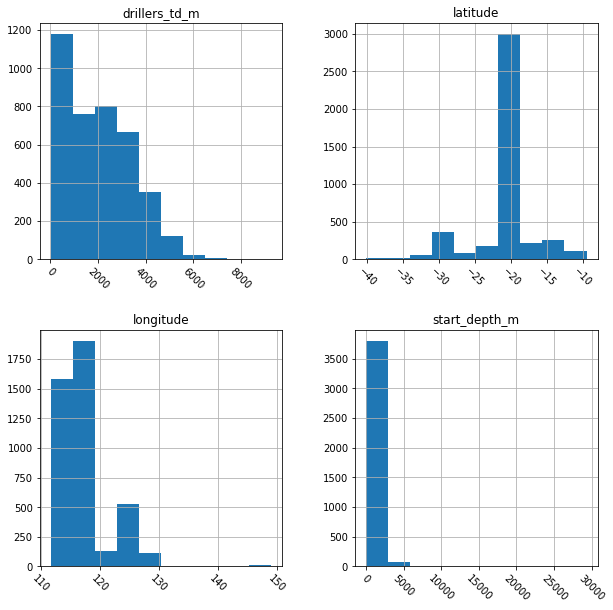

In [15]:
# Plot histogram grid
df.hist(figsize=(10,10), xrot=-45)

# Clear the text "residue"
plt.show()

Next, display formal summary statistics for the numeric features.


In [16]:
# Summarize numerical features
df.describe()

latitude    longitude  start_depth_m  drillers_td_m
count  4287.000000  4287.000000    3864.000000    3912.000000
mean    -21.041092   117.112209     270.085753    2070.972638
std       4.172880     4.341813     877.219468    1348.436572
min     -40.136045   111.594852       0.000000       5.300000
25%     -21.433878   115.024522       0.000000     785.000000
50%     -20.793889   115.391127       0.000000    1884.500000
75%     -19.775861   116.433334       0.000000    3053.000000
max      -9.498038   149.042500   29323.000000    9278.000000

### 3. Distributions of categorical features

First, display the summary statistics for categorical features in the dataset.


In [17]:
# Summarize categorical features
df.describe(include=['object'])

uwi      well     ubhi borehole_name state jurisdiction offshore  \
count      4287      4287     4287          4287  4287         4287     4287   
unique     3620      3620     4287          4254     7            3        2   
top     W002701  Bambra 6  W002317        GWA 15    WA        State        Y   
freq         10        10        1             3  4201         2422     2309   

                     basin         sub-basin legislation title  \
count                 4263              4225        4161  4116   
unique                  18                98          11   736   
top     Northern Carnarvon  Barrow Sub-basin    P(SL)A67  L 1H   
freq                  2925              1554        1182   693   

                                well_operator         borehole_operator  \
count                                    4275                        35   
unique                                    258                        13   
top     West Australian Petroleum Pty Limited  DDG Tubridgi Pty Limited   
freq                                     1282                         9   

       borehole_reason class          structure            seismic_location  \
count              988  4273               2841                        1725   
unique              13    19                 46                        1365   
top           ORIGINAL   DEV  Faulted Anticline  H93S - Inline 496, CDP 607   
freq               412  1649               1113                          20   

       drilled_by     rigs spud_kick_off_date    td_date rig_release_date  \
count        3997     4154               4244       3865             3620   
unique        128      257               3667       3390             2819   
top       Unknown  UNKNOWN          1/01/1972  1/01/1972       28/03/2009   
freq          610      618                 16         16               21   

       oil_show gas_show condensate_show      oil_field discovery_well status  \
count      2943     2615             650           2406           2406   4135   
unique        6        6               6            212              2     36   
top      L0 Nil   G0 Nil          L0 Nil  Barrow Island              N    P&A   
freq       1061     1142             576            895           2157   1106   

       well_head basic_relevant_date  
count       3640                4063  
unique         3                2011  
top            N          10/02/2009  
freq        1907                 875

Using a loop, display bar plots for each of the categorical features.


Using a loop, display bar plots for each of the categorical features.

In [18]:
df_objects_list = ("Basin","State","Borehole operator","Class","Borehole reason","Oil show","Gas show","Condensate show","Status")

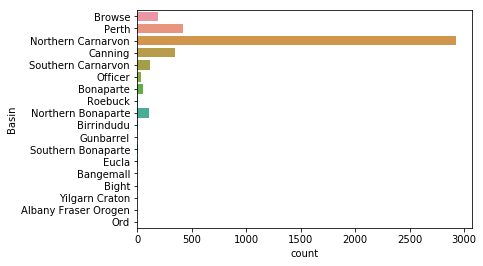

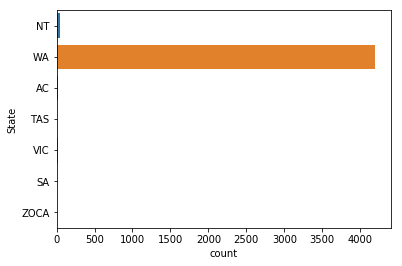

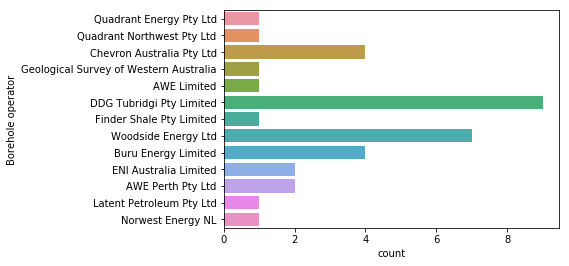

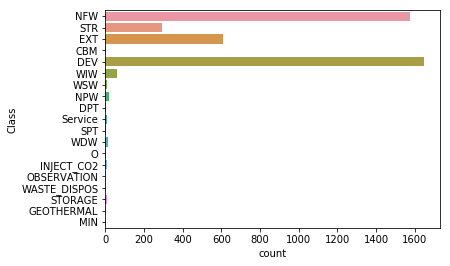

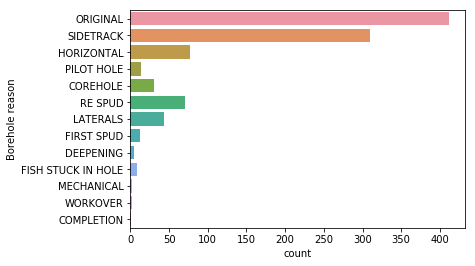

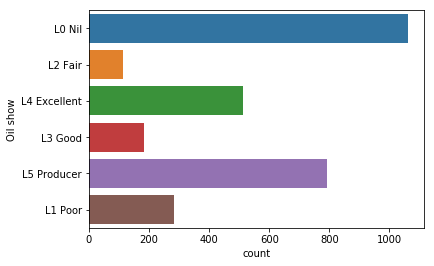

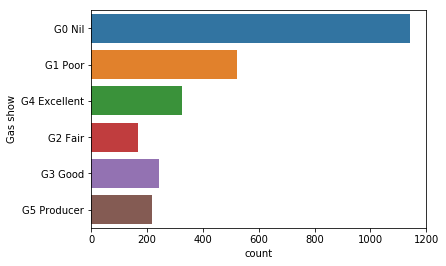

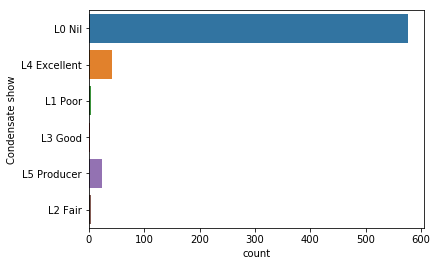

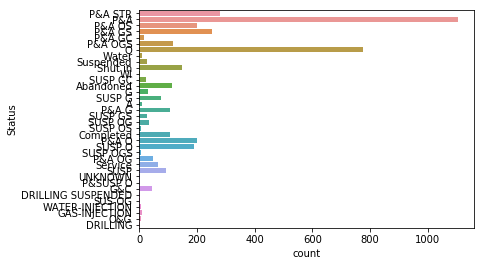

In [10]:
# Plot bar plot for each categorical feature
for feature in df_objects_list:
    sns.countplot(y=feature, data=df)
    plt.show()

### 4. Segmentations

Next, let's create some segmentations. Segmentations are powerful ways to cut the data to observe the relationship between categorical features and numeric features

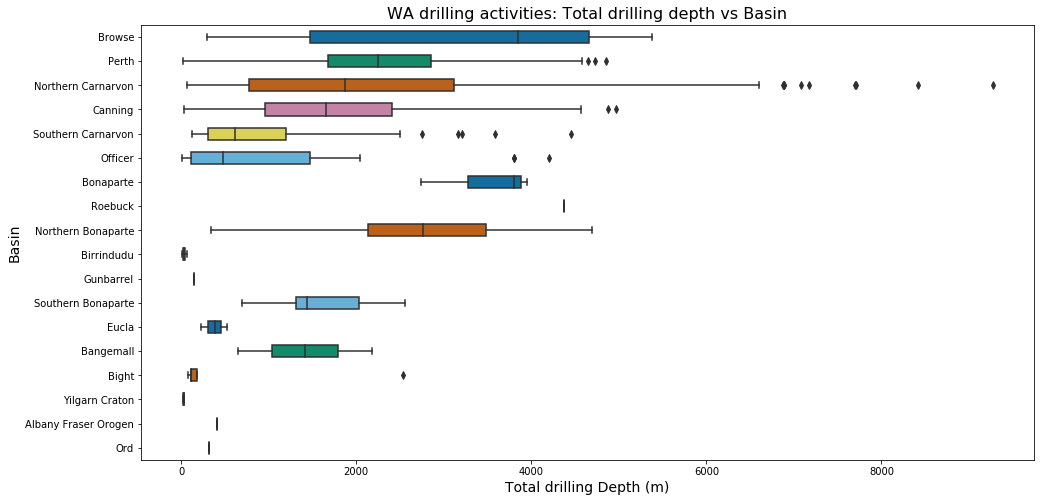

In [33]:
# Segment basin by drillers_td_m and plot distributions
plt.figure(figsize=(16, 8))
bplot=sns.boxplot(y='basin', x='drillers_td_m', data=df, width=0.5,
                 palette="colorblind")
bplot.axes.set_title("WA drilling activities: Total drilling depth vs Basin",
                    fontsize=16)
 
bplot.set_xlabel("Total drilling Depth (m)", 
                fontsize=14)
 
bplot.set_ylabel("Basin",
                fontsize=14)
 
bplot.tick_params(labelsize=10)
plt.show()

In [34]:
# Sort well_operator and display the top 20 samples
df.well_operator.value_counts(ascending=False).head(20)

West Australian Petroleum Pty Limited          1282
Apache Northwest Pty Ltd                        386
Woodside Energy Ltd                             343
Chevron Australia Pty Ltd                       139
BHP Billiton Petroleum (Australia) Pty Ltd      119
Woodside Offshore Petroleum Pty Ltd             107
Western Mining Corporation Ltd                   98
BHP Petroleum (Australia) Pty Ltd                80
Ampol Exploration Ltd                            68
Woodside Petroleum Development Pty Ltd           61
Geoscience Australia                             61
Santos Limited                                   59
Arc Energy Limited                               45
Apache Energy Limited                            41
Shell Development (Australia) Pty Ltd            36
Home Energy Co Ltd                               34
Esso Exploration & Production Australia Inc      32
Buru Energy Limited                              30
Origin Energy Developments Pty Limited           27
Hess Explora

### 5. Correlations

Finally, let's take a look at the relationships between numeric features and other numeric features.


Create a correlations dataframe from df.



In [35]:
# Calculate correlations between numeric features
correlations = df.corr()

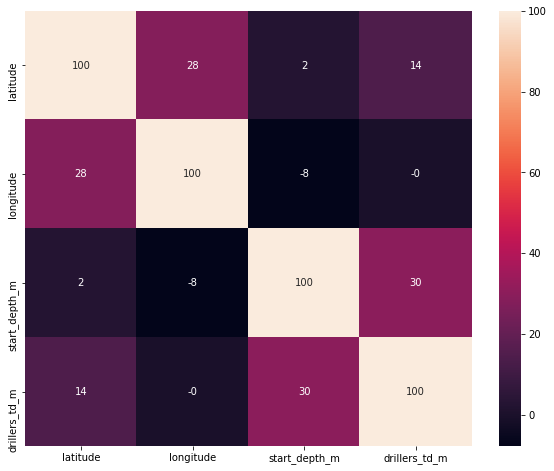

In [40]:
# Make the figsize 10 x 8
plt.figure(figsize=(10,8))

# Plot heatmap of annotated correlations
sns.heatmap(correlations * 100, annot=True, fmt='.0f')
plt.show()

# Module 2 : Data Wrangling


# In this module...
In this module, we'll cover the essential data cleaning steps:


2.Fix structural errors 

3.Remove unwanted outliers

 4.Label missing categorical data


5.Flag and fill missing numerical data 

Finally, we'll save the cleaned dataframe to a new file so we can use it in other modules.

First, let's import libraries and load the dataset.
In general, it's good practice to keep all of your library imports at the top of your notebook or program.

Before we do anything else, let's import the print() function from the future to ensure our code is compatible with Python 3.

In [42]:
from __future__ import print_function  # Compatability with Python 3
print( 'Print function ready to serve.' )

Print function ready to serve.


Next, let's import the libraries we'll need for this module.


In [43]:
import pandas as pd
pd.set_option('display.max_columns', 100)

import numpy as np

from matplotlib import pyplot as plt
%matplotlib inline

import seaborn as sns

### 1. Drop unwanted observations

In [44]:
#check dataset dimensions
df.shape

(4287, 34)

In [45]:
# Drop duplicates
df = df.drop_duplicates()
print( df.shape )

(4287, 34)


There is no duplicated values found in this dataset!

### 2. Fix structural errors

In [46]:
df.dtypes.index

Index(['uwi', 'well', 'ubhi', 'borehole_name', 'state', 'jurisdiction',
       'offshore', 'basin', 'sub-basin', 'latitude', 'longitude',
       'legislation', 'title', 'well_operator', 'borehole_operator',
       'borehole_reason', 'class', 'structure', 'seismic_location',
       'drilled_by', 'rigs', 'spud_kick_off_date', 'td_date',
       'rig_release_date', 'start_depth_m', 'drillers_td_m', 'oil_show',
       'gas_show', 'condensate_show', 'oil_field', 'discovery_well', 'status',
       'well_head', 'basic_relevant_date'],
      dtype='object')

The start depth of drilling should be filled with 0

In [47]:
# Missing start_depth_m values should be 0
df['start_depth_m'] = df.start_depth_m.fillna(0)

In [48]:
df.status.unique()

array([nan, 'P&A STR', 'P&A', 'P&A OS', 'P&A GS', 'P&A GC', 'P&A OGS',
       'O', 'Water', 'Suspended', 'Shut in', 'WI', 'SUSP GC', 'Abandoned',
       'G', 'SUSP G', 'A', 'P&A G', 'SUSP GS', 'SUSP OG', 'SUSP OS',
       'Completed', 'P&A O', 'SUSP O', 'SUSP OGS', 'P&A OG', 'Service',
       'SUSP', 'UNKNOWN', 'P&SUSP O', 'G&C', 'DRILLING SUSPENDED',
       'SUS-OG', 'WATER-INJECTION', 'GAS-INJECTION', 'O&G', 'DRILLING'],
      dtype=object)

The well status could be grouped by three groups: PA, SUSPENDED and OTHERS

In [51]:
# Group to PA
df.status.replace(['P&A STR', 'P&A', 'P&A OS', 'P&A GS', 'P&A GC', 'P&A OGS','P&A G','P&A O','P&A OG','Abandoned'], 'PA', inplace=True)
#Group to SUSPENDED
df.status.replace(['Suspended', 'Shut in','SUSP GC','SUSP G','SUSP GS', 'SUSP OG', 'SUSP OS','P&SUSP O','SUSP OGS','SUSP','P&SUSP O','DRILLING SUSPENDED', 'SUS-OG', 'SUSP O'],'SUSPENDED', inplace=True)
#Group to OTHERS
df.status.replace(['O', 'Water','WI', 'G', 'A','Service', 'UNKNOWN', 'G&C', 'WATER-INJECTION', 'GAS-INJECTION', 'O&G', 'DRILLING', 'Completed'],'OTHERS',inplace=True)

In [52]:
df.status.unique()

array([nan, 'PA', 'OTHERS', 'SUSPENDED'], dtype=object)

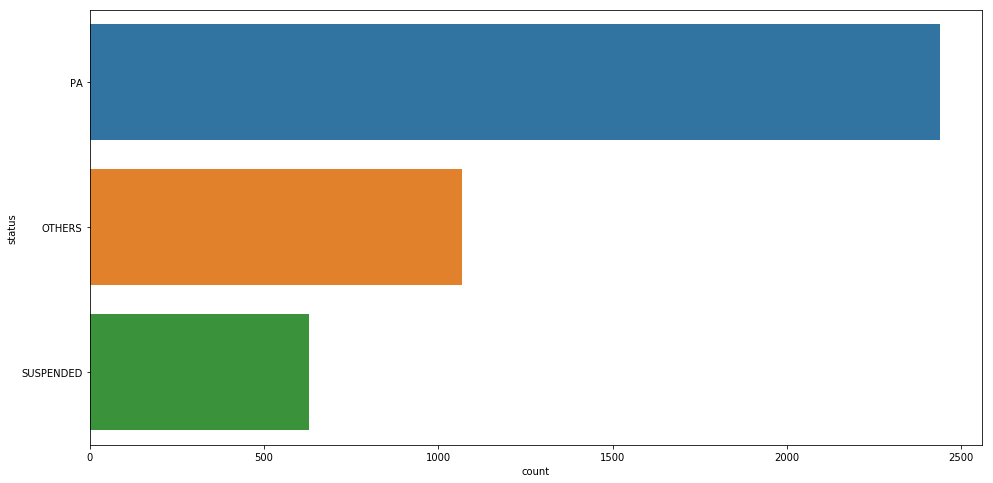

In [65]:
# Class distributions for 'status'
plt.figure(figsize=(16, 8))
sns.countplot(y='status', data=df)
plt.show()


In [57]:
df.basin.unique()

array(['Browse', 'Perth', 'Northern Carnarvon', 'Canning',
       'Southern Carnarvon', 'Officer', 'Bonaparte', 'Roebuck',
       'Northern Bonaparte', nan, 'Birrindudu', 'Gunbarrel',
       'Southern Bonaparte', 'Eucla', 'Bangemall', 'Bight',
       'Yilgarn Craton', 'Albany Fraser Orogen', 'Ord'], dtype=object)

The basins could be categoried into 4 groups: Browse, Perth, Carnarvon, Canning, Bonaparte and Others

In [58]:
df.basin.replace(['Northern Carnarvon','Southern Carnarvon'],'Carnarvon',inplace=True)

In [59]:
df.basin.replace(['Northern Bonaparte','Southern Bonaparte'],'Bonaparte',inplace=True)

In [60]:
df.basin.replace(['Roebuck','Birrindudu', 'Gunbarrel', 'Eucla', 'Bangemall',
       'Bight', 'Yilgarn Craton', 'Albany Fraser Orogen', 'Ord','Officer'],'Bonaparte',inplace=True)

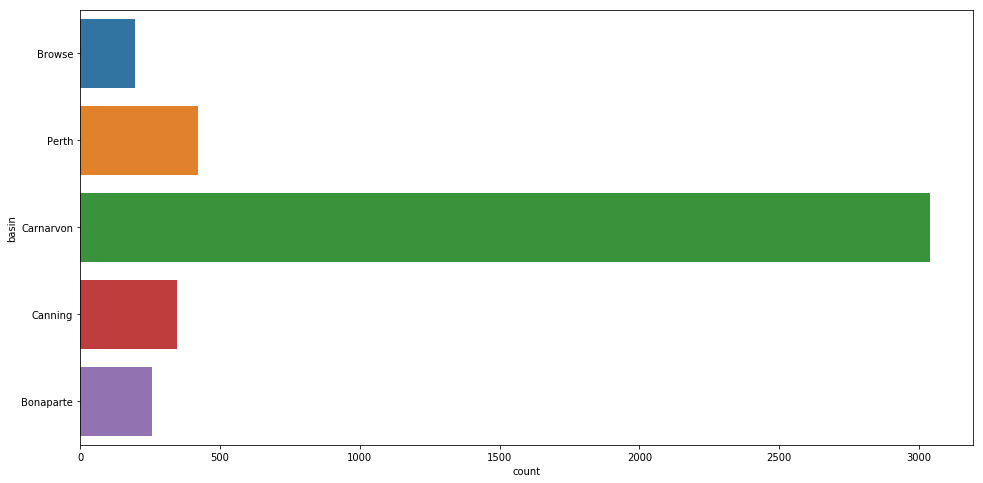

In [61]:
# Class distributions for 'status'
plt.figure(figsize=(16, 8))
sns.countplot(y='basin', data=df)
plt.show()

### 3. Remove unwanted outliers

Outliers can cause problems with certain types of models.


Start with a box plot of your target variable, since that's the variable that you're actually trying to predict.

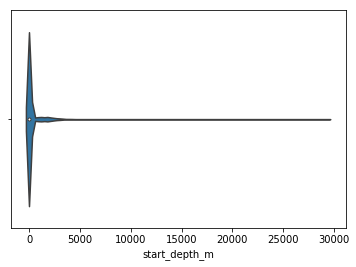

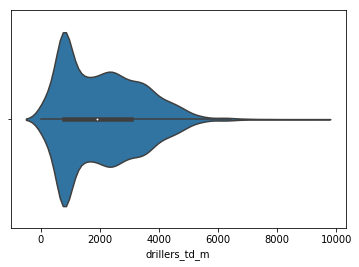

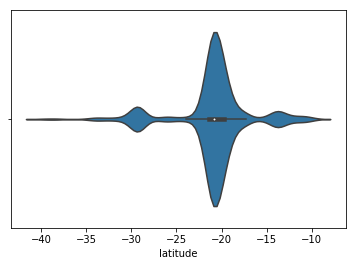

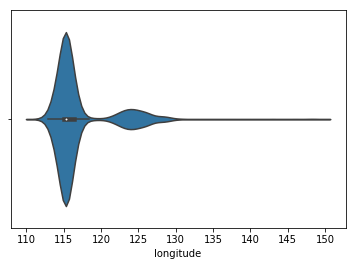

In [66]:
# Violin plot of 'start_depth_m' using the Seaborn library
sns.violinplot(df.start_depth_m)
plt.show()

# Violin plot of 'drillers_td_m' using the Seaborn library
sns.violinplot(df.drillers_td_m)
plt.show()

# Violin plot of 'latitude' using the Seaborn library
sns.violinplot(df.latitude)
plt.show()

# Violin plot of 'latitude' using the Seaborn library
sns.violinplot(df.longitude)
plt.show()

Among those four features, it looks like start_depth_m and drillers_td_m have a potential outlier!

Look at its long and skinny tail.
Let's look at the depthest 5 wells just to confirm.

In [68]:
# Sort start_depth_m and display the top 5 samples
df.start_depth_m.sort_values(ascending=False).head()

3482    29323.0
2138     6216.0
2933     6020.0
2135     5918.0
150      5757.0
Name: start_depth_m, dtype: float64

The top values shoud not be real as the deepest well in the world is 10000. So, it should be dropt out

In [69]:
# Remove start_depth_m outliers
df = df[df.start_depth_m < 29323.0]

# print length of df
print( len(df) )

4286


In [53]:
# Sort drillers_td_m and display the top 5 samples
df.drillers_td_m.sort_values(ascending=False).head()

2144    9278.0
2135    8420.0
2138    7713.0
2132    7700.0
2933    7175.0
Name: drillers_td_m, dtype: float64

Those values look reasonable!

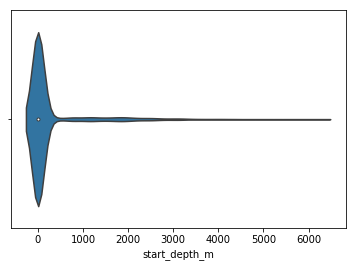

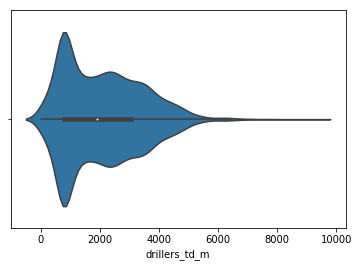

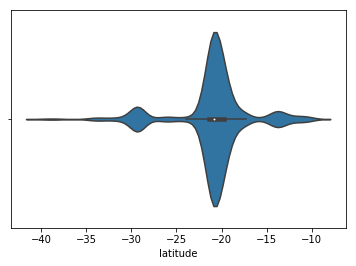

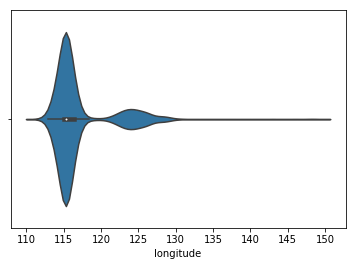

In [70]:
#Re-plot those values:

# Violin plot of 'start_depth_m' using the Seaborn library
sns.violinplot(df.start_depth_m)
plt.show()

# Violin plot of 'drillers_td_m' using the Seaborn library
sns.violinplot(df.drillers_td_m)
plt.show()

# Violin plot of 'latitude' using the Seaborn library
sns.violinplot(df.latitude)
plt.show()

# Violin plot of 'latitude' using the Seaborn library
sns.violinplot(df.longitude)
plt.show()

### 4. Label missing categorical data

It's finally time to address missing data.

First, find and count the missing categorical data.


In [71]:
# Display number of missing values by feature (categorical)
df.select_dtypes(include=['object']).isnull().sum()

uwi                       0
well                      0
ubhi                      0
borehole_name             0
state                     0
jurisdiction              0
offshore                  0
basin                    24
sub-basin                62
legislation             126
title                   171
well_operator            12
borehole_operator      4251
borehole_reason        3299
class                    14
structure              1446
seismic_location       2562
drilled_by              290
rigs                    133
spud_kick_off_date       43
td_date                 422
rig_release_date        667
oil_show               1343
gas_show               1671
condensate_show        3636
oil_field              1880
discovery_well         1880
status                  152
well_head               647
basic_relevant_date     224
dtype: int64

The number of objects missing in the data is due to the quality of raw data collection. We can improve the quality of input data by manually acquire well's documents & update. But, it requires a lot of time & effort

### 5. Flag and fill missing numeric data

Finally, let's flag and fill missing numeric data.

First, let's find and count missing values in numerical feature.

In [73]:
# Display number of missing values by feature (numeric)
df.select_dtypes(exclude=['object']).isnull().sum()

latitude           0
longitude          0
start_depth_m      0
drillers_td_m    375
dtype: int64

The missing values of drillers_td_m is acceptable as in the dataset, there are plenty of wells are drilling

Finally, let's save the cleaned dataframe.

In [74]:
# Save cleaned dataframe to new file
df.to_csv('cleaned_df.csv', index=None)

# Module 3: Feature Engineering

After cleaning the dataset, the next step is to engineer features that can help our predictive models.

The engineered features are often more specific or isolate key information.


In [75]:
from __future__ import print_function  # Compatability with Python 3
print( 'Print function ready to serve.' )

Print function ready to serve.


Next, let's import the libraries we'll need for this module.


In [76]:
# NumPy for numerical computing
import numpy as np

# Pandas for DataFrames
import pandas as pd
pd.set_option('display.max_columns', 100)
pd.options.mode.chained_assignment = None  # default='warn'

# Matplotlib for visualization
from matplotlib import pyplot as plt
# display plots in the notebook
%matplotlib inline 

# Seaborn for easier visualization
import seaborn as sns

In [77]:
# Load cleaned dataset from Module 2
df = pd.read_csv('cleaned_df.csv')

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4286 entries, 0 to 4285
Data columns (total 34 columns):
uwi                    4286 non-null object
well                   4286 non-null object
ubhi                   4286 non-null object
borehole_name          4286 non-null object
state                  4286 non-null object
jurisdiction           4286 non-null object
offshore               4286 non-null object
basin                  4262 non-null object
sub-basin              4224 non-null object
latitude               4286 non-null float64
longitude              4286 non-null float64
legislation            4160 non-null object
title                  4115 non-null object
well_operator          4274 non-null object
borehole_operator      35 non-null object
borehole_reason        987 non-null object
class                  4272 non-null object
structure              2840 non-null object
seismic_location       1724 non-null object
drilled_by             3996 non-null object
rigs          

### 1. Group sparse classes

In [233]:
df.head()

uwi           well     ubhi  borehole_name state  jurisdiction  \
0  W005895     Abalone  1  W005895     Abalone  1    NT  Commonwealth   
1  W000019  Abbarwardoo 1  W000019  Abbarwardoo 1    WA         State   
2  W001778   Abduls Dam 1  W001778   Abduls Dam 1    WA         State   
3  W001070     Abutilon 1  W001070     Abutilon 1    WA         State   
4  W001071       Acacia 1  W001071       Acacia 1    WA         State   

  offshore      basin          sub-basin   latitude   longitude legislation  \
0        Y     Browse  Caswell Sub-basin -13.122655  123.190210         NaN   
1        N      Perth  Dandaragan Trough -28.584869  115.161167      PSSA59   
2        N  Carnarvon   Barrow Sub-basin -21.949297  114.830121        PA67   
3        N    Canning   Barbwire Terrace -19.453597  125.117961        PA36   
4        N    Canning   Barbwire Terrace -19.329229  124.995583        PA67   

       title                          well_operator borehole_operator  \
0        NaN                                    NaN               NaN   
1     PE-27H  West Australian Petroleum Pty Limited               NaN   
2  EP 110 R2               Pan Pacific Petroleum NL               NaN   
3     EP 143         Western Mining Corporation Ltd               NaN   
4     EP 143         Western Mining Corporation Ltd               NaN   

  borehole_reason class             structure                seismic_location  \
0             NaN   NFW                   NaN                             NaN   
1             NaN   STR            Fault Trap                             NaN   
2             NaN   NFW            Fault Trap               PP90A-201  SP 480   
3             NaN   STR  Four-way dip closure                             NaN   
4             NaN   STR             Anticline  Intersection Lines 72-6 & 74-8   

                      drilled_by                    rigs spud_kick_off_date  \
0       Diamond Offshore Company                     NaN          4/09/2000   
1        Geophysical Service Inc     Geol SI Mayhew 2000         12/12/1962   
2           Petro Supply Pty Ltd  Petro Services Rig   2         18/08/1991   
3  Rockdrill Contractors Pty Ltd   Rockdrill Longyear 55          2/07/1981   
4  Rockdrill Contractors Pty Ltd   Rockdrill Longyear 55         19/08/1981   

      td_date rig_release_date  start_depth_m  drillers_td_m oil_show  \
0         NaN       24/11/2000            0.0            NaN      NaN   
1  20/12/1962       20/12/1962            0.0          600.0   L0 Nil   
2   2/09/1991        4/09/1991            0.0          770.0   L0 Nil   
3  12/08/1981       17/08/1981            0.0          850.3   L0 Nil   
4  15/09/1981       20/09/1981            0.0         1208.7  L2 Fair   

  gas_show condensate_show oil_field discovery_well status well_head  \
0      NaN             NaN       NaN            NaN    NaN       NaN   
1   G0 Nil             NaN       NaN            NaN     PA         N   
2   G0 Nil             NaN       NaN            NaN     PA         N   
3   G0 Nil             NaN       NaN            NaN     PA         N   
4  G1 Poor             NaN       NaN            NaN     PA         N   

  basic_relevant_date  
0                 NaN  
1          20/06/1963  
2           4/10/1993  
3          27/07/1987  
4           5/11/1987

In [234]:
df.dtypes.index

Index(['uwi', 'well', 'ubhi', 'borehole_name', 'state', 'jurisdiction',
       'offshore', 'basin', 'sub-basin', 'latitude', 'longitude',
       'legislation', 'title', 'well_operator', 'borehole_operator',
       'borehole_reason', 'class', 'structure', 'seismic_location',
       'drilled_by', 'rigs', 'spud_kick_off_date', 'td_date',
       'rig_release_date', 'start_depth_m', 'drillers_td_m', 'oil_show',
       'gas_show', 'condensate_show', 'oil_field', 'discovery_well', 'status',
       'well_head', 'basic_relevant_date'],
      dtype='object')

In [80]:
df.rename(columns={'class':'well_class'},inplace=True)

In [81]:
df.well_class.value_counts()

DEV             1649
NFW             1573
EXT              607
STR              293
WIW               61
NPW               18
WDW               12
Service           11
STORAGE           10
INJECT_CO2        10
WSW               10
CBM                6
SPT                3
WASTE_DISPOS       2
DPT                2
OBSERVATION        2
O                  1
GEOTHERMAL         1
MIN                1
Name: well_class, dtype: int64

The next heuristic we'll consider is grouping sparse classes in our categorical features.
Let's begin by plotting the bar plots for 'well_class'.

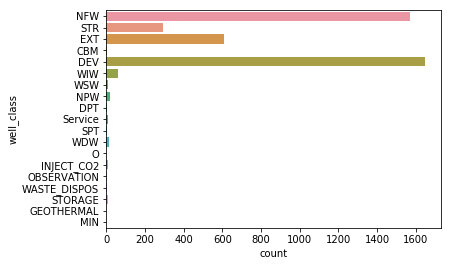

In [82]:
# Bar plot for well_class
sns.countplot(y='well_class', data=df)

In [83]:
df.well_class.unique()

array(['NFW', 'STR', 'EXT', 'CBM', 'DEV', 'WIW', 'WSW', 'NPW', 'DPT',
       'Service', 'SPT', 'WDW', 'O', nan, 'INJECT_CO2', 'OBSERVATION',
       'WASTE_DISPOS', 'STORAGE', 'GEOTHERMAL', 'MIN'], dtype=object)

The well class could be grouped in to 4 categories: NFW, EXT, DEV and OTHERS

In [84]:
# Group NFW
df.well_class.replace(['WIW', 'WSW','NPW','WDW',], 'NFW', inplace=True)
#Group EXT
df.well_class.replace(['CBM','OBSERVATION'],'EXT',inplace=True)
#Group DEV
df.well_class.replace(['DPT', 'SPT','INJECT_CO2','WASTE_DISPOS','STORAGE', 'GEOTHERMAL'],'DEV',inplace=True)
#Group OTHERS
df.well_class.replace(['Service','O','Missing','MIN','STR'],'OTHERS',inplace=True)


In [85]:
df.well_class.unique()

array(['NFW', 'OTHERS', 'EXT', 'DEV', nan], dtype=object)

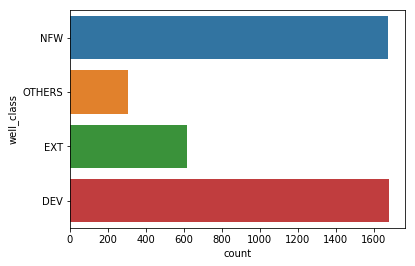

In [86]:
# Bar plot for well_class
sns.countplot(y='well_class', data=df)

### 2. Create interaction features

The total time of drilling play one of the most critical roles metric the success of drilling activity. The more time we spend on a well, the more money we burn. Remind that the daily cost for a well is around $1mil 

#### Creating the total time of drilling from spud_kick_off_date and rig_release_date.

In [87]:
df.dtypes.index

Index(['uwi', 'well', 'ubhi', 'borehole_name', 'state', 'jurisdiction',
       'offshore', 'basin', 'sub-basin', 'latitude', 'longitude',
       'legislation', 'title', 'well_operator', 'borehole_operator',
       'borehole_reason', 'well_class', 'structure', 'seismic_location',
       'drilled_by', 'rigs', 'spud_kick_off_date', 'td_date',
       'rig_release_date', 'start_depth_m', 'drillers_td_m', 'oil_show',
       'gas_show', 'condensate_show', 'oil_field', 'discovery_well', 'status',
       'well_head', 'basic_relevant_date'],
      dtype='object')

In [89]:
df[['well','spud_kick_off_date','rig_release_date']].head()

well spud_kick_off_date rig_release_date
0     Abalone  1          4/09/2000       24/11/2000
1  Abbarwardoo 1         12/12/1962       20/12/1962
2   Abduls Dam 1         18/08/1991        4/09/1991
3     Abutilon 1          2/07/1981       17/08/1981
4       Acacia 1         19/08/1981       20/09/1981

The time format need to be coverted to datetime for manipualtion

In [90]:
from datetime import datetime
date_format = "%d/%m/%Y"

In [91]:
df['rig_release_date'] = pd.to_datetime(df['rig_release_date'],dayfirst=True, errors='coerce')
df['spud_kick_off_date'] = pd.to_datetime(df['spud_kick_off_date'],dayfirst=True, errors='coerce')
df['drilling_days'] = pd.to_datetime(df['rig_release_date'],dayfirst=True, errors='coerce') - pd.to_datetime(df['spud_kick_off_date'],dayfirst=True, errors='coerce')

In [93]:
#print the drilling days
df[['well','spud_kick_off_date','rig_release_date','drilling_days']].head()

well spud_kick_off_date rig_release_date drilling_days
0     Abalone  1         2000-09-04       2000-11-24       81 days
1  Abbarwardoo 1         1962-12-12       1962-12-20        8 days
2   Abduls Dam 1         1991-08-18       1991-09-04       17 days
3     Abutilon 1         1981-07-02       1981-08-17       46 days
4       Acacia 1         1981-08-19       1981-09-20       32 days

At this points, we need to covert the data type of drilling_days to numeric type for the future model

In [102]:
df.dtypes

uwi                             object
well                            object
ubhi                            object
borehole_name                   object
state                           object
jurisdiction                    object
offshore                        object
basin                           object
sub-basin                       object
latitude                       float64
longitude                      float64
legislation                     object
title                           object
well_operator                   object
borehole_operator               object
borehole_reason                 object
well_class                      object
structure                       object
seismic_location                object
drilled_by                      object
rigs                            object
spud_kick_off_date      datetime64[ns]
td_date                         object
rig_release_date        datetime64[ns]
start_depth_m                  float64
drillers_td_m            

In [103]:
df['total_drilling_days'] = df.drilling_days.dt.days

In [106]:
#check the outliner of total drilling days
df.total_drilling_days.sort_values(ascending=False).head()

3663    27418.0
2355    24493.0
2709     2603.0
3071     2597.0
3072     2597.0
Name: total_drilling_days, dtype: float64

Any rows which have the drilling days greater than 1 year (365 days) need to be get rid of.

In [107]:
# Remove start_depth_m outliers
df = df[df.total_drilling_days < 365.0]

# print length of df
print( len(df)) 

3502


In [108]:
#Re-check the outliner of total drilling days
df.total_drilling_days.sort_values(ascending=False).head()

2598    364.0
3132    363.0
3111    359.0
2067    358.0
3131    354.0
Name: total_drilling_days, dtype: float64

In [109]:
#code testing to made sure the drilling days should be greater than or equal 0 day
print(df.drilling_days.min())

0 days 00:00:00


#### Creating  the length of a drilling activity

One of the critical facets of drilling performance is the total length of drilling activity. We create a range of drilling by subtracting drillers_td_m to start_depth_m

In [110]:
df[['well','start_depth_m','drillers_td_m']].head()

well  start_depth_m  drillers_td_m
0     Abalone  1            0.0            NaN
1  Abbarwardoo 1            0.0          600.0
2   Abduls Dam 1            0.0          770.0
3     Abutilon 1            0.0          850.3
4       Acacia 1            0.0         1208.7

In [111]:
df['drilling_lengh'] = df['drillers_td_m'] - df['start_depth_m']

In [99]:
df.drilling_lengh.max()

9278.0

In [100]:
df.head()

uwi           well     ubhi  borehole_name state  jurisdiction  \
0  W005895     Abalone  1  W005895     Abalone  1    NT  Commonwealth   
1  W000019  Abbarwardoo 1  W000019  Abbarwardoo 1    WA         State   
2  W001778   Abduls Dam 1  W001778   Abduls Dam 1    WA         State   
3  W001070     Abutilon 1  W001070     Abutilon 1    WA         State   
4  W001071       Acacia 1  W001071       Acacia 1    WA         State   

  offshore      basin          sub-basin   latitude   longitude legislation  \
0        Y     Browse  Caswell Sub-basin -13.122655  123.190210         NaN   
1        N      Perth  Dandaragan Trough -28.584869  115.161167      PSSA59   
2        N  Carnarvon   Barrow Sub-basin -21.949297  114.830121        PA67   
3        N    Canning   Barbwire Terrace -19.453597  125.117961        PA36   
4        N    Canning   Barbwire Terrace -19.329229  124.995583        PA67   

       title                          well_operator borehole_operator  \
0        NaN                                    NaN               NaN   
1     PE-27H  West Australian Petroleum Pty Limited               NaN   
2  EP 110 R2               Pan Pacific Petroleum NL               NaN   
3     EP 143         Western Mining Corporation Ltd               NaN   
4     EP 143         Western Mining Corporation Ltd               NaN   

  borehole_reason well_class             structure  \
0             NaN        NFW                   NaN   
1             NaN     OTHERS            Fault Trap   
2             NaN        NFW            Fault Trap   
3             NaN     OTHERS  Four-way dip closure   
4             NaN     OTHERS             Anticline   

                 seismic_location                     drilled_by  \
0                             NaN       Diamond Offshore Company   
1                             NaN        Geophysical Service Inc   
2               PP90A-201  SP 480           Petro Supply Pty Ltd   
3                             NaN  Rockdrill Contractors Pty Ltd   
4  Intersection Lines 72-6 & 74-8  Rockdrill Contractors Pty Ltd   

                     rigs spud_kick_off_date     td_date rig_release_date  \
0                     NaN         2000-09-04         NaN       2000-11-24   
1     Geol SI Mayhew 2000         1962-12-12  20/12/1962       1962-12-20   
2  Petro Services Rig   2         1991-08-18   2/09/1991       1991-09-04   
3   Rockdrill Longyear 55         1981-07-02  12/08/1981       1981-08-17   
4   Rockdrill Longyear 55         1981-08-19  15/09/1981       1981-09-20   

   start_depth_m  drillers_td_m oil_show gas_show condensate_show oil_field  \
0            0.0            NaN      NaN      NaN             NaN       NaN   
1            0.0          600.0   L0 Nil   G0 Nil             NaN       NaN   
2            0.0          770.0   L0 Nil   G0 Nil             NaN       NaN   
3            0.0          850.3   L0 Nil   G0 Nil             NaN       NaN   
4            0.0         1208.7  L2 Fair  G1 Poor             NaN       NaN   

  discovery_well status well_head basic_relevant_date drilling_days  \
0            NaN    NaN       NaN                 NaN       81 days   
1            NaN     PA         N          20/06/1963        8 days   
2            NaN     PA         N           4/10/1993       17 days   
3            NaN     PA         N          27/07/1987       46 days   
4            NaN     PA         N           5/11/1987       32 days   

   drilling_lengh  
0             NaN  
1           600.0  
2           770.0  
3           850.3  
4          1208.7

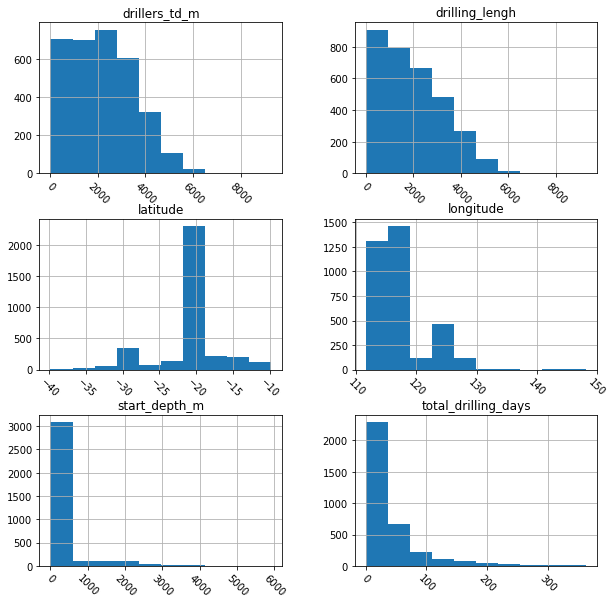

In [112]:
# Plot histogram grid
df.hist(figsize=(10,10), xrot=-45)

# Clear the text "residue"
plt.show()

#### Creating the well perfomance metric

One of the very first metric to value the success of drilling activity is metric to spend on a meter of drilling. To be the extent, the KPI for success is how much (in $) we consume on a meter. But, in this dataset, the budget on the well is undisclosed. 

In [116]:
#fill na value of drilling_lengh to 0
df['drilling_lengh'] = df['drilling_lengh'].fillna(0)

In [117]:
#fill na value of total_drilling_days to 0
df['total_drilling_days']=df['total_drilling_days'].fillna(0)

In [118]:
df[['drilling_lengh','total_drilling_days']].head()

drilling_lengh  total_drilling_days
0             0.0                 81.0
1           600.0                  8.0
2           770.0                 17.0
3           850.3                 46.0
4          1208.7                 32.0

In [120]:
#Creat the well_perfomance value
df['well_perfomance'] = df['drilling_lengh']/df['total_drilling_days']

In [121]:
#Data conditioning
df['well_perfomance'] = df.well_perfomance.fillna(0)
df = df.replace([np.inf, -np.inf], np.nan)

In [122]:
#Code tesing
df.well_perfomance.describe()

count    3464.000000
mean       83.727341
std        80.796949
min         0.000000
25%        32.218077
50%        65.928922
75%       111.129464
max      1120.000000
Name: well_perfomance, dtype: float64

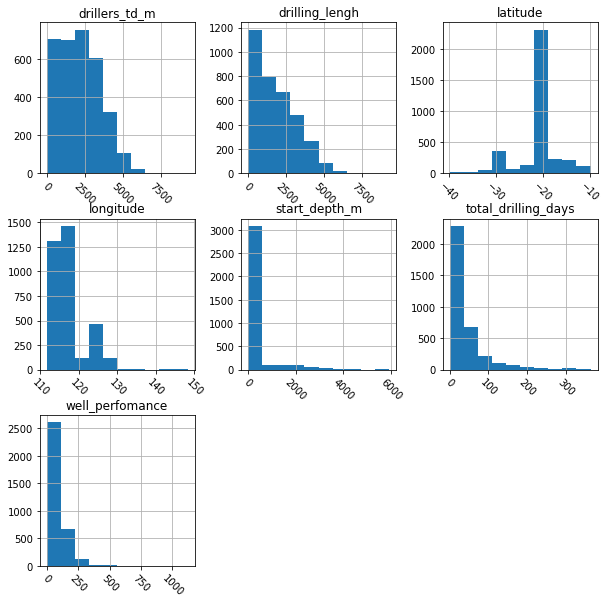

In [123]:
# Plot histogram grid
df.hist(figsize=(10,10), xrot=-45)

# Clear the text "residue"
plt.show()

In [101]:
df.dtypes.index

Index(['uwi', 'well', 'ubhi', 'borehole_name', 'state', 'jurisdiction',
       'offshore', 'basin', 'sub-basin', 'latitude', 'longitude',
       'legislation', 'title', 'well_operator', 'borehole_operator',
       'borehole_reason', 'well_class', 'structure', 'seismic_location',
       'drilled_by', 'rigs', 'spud_kick_off_date', 'td_date',
       'rig_release_date', 'start_depth_m', 'drillers_td_m', 'oil_show',
       'gas_show', 'condensate_show', 'oil_field', 'discovery_well', 'status',
       'well_head', 'basic_relevant_date', 'drilling_days', 'drilling_lengh',
       'total_drilling_days', 'well_perfomance'],
      dtype='object')

#### Extract year when drilling activity is taken place

In [124]:
df[['borehole_name','well_operator','discovery_well','well_perfomance']].head()

borehole_name                          well_operator discovery_well  \
0     Abalone  1                                    NaN            NaN   
1  Abbarwardoo 1  West Australian Petroleum Pty Limited            NaN   
2   Abduls Dam 1               Pan Pacific Petroleum NL            NaN   
3     Abutilon 1         Western Mining Corporation Ltd            NaN   
4       Acacia 1         Western Mining Corporation Ltd            NaN   

   well_perfomance  
0         0.000000  
1        75.000000  
2        45.294118  
3        18.484783  
4        37.771875

In [125]:
df['year']=pd.DatetimeIndex(df['spud_kick_off_date']).year

In [126]:
df.head()

uwi           well     ubhi  borehole_name state  jurisdiction  \
0  W005895     Abalone  1  W005895     Abalone  1    NT  Commonwealth   
1  W000019  Abbarwardoo 1  W000019  Abbarwardoo 1    WA         State   
2  W001778   Abduls Dam 1  W001778   Abduls Dam 1    WA         State   
3  W001070     Abutilon 1  W001070     Abutilon 1    WA         State   
4  W001071       Acacia 1  W001071       Acacia 1    WA         State   

  offshore      basin          sub-basin   latitude   longitude legislation  \
0        Y     Browse  Caswell Sub-basin -13.122655  123.190210         NaN   
1        N      Perth  Dandaragan Trough -28.584869  115.161167      PSSA59   
2        N  Carnarvon   Barrow Sub-basin -21.949297  114.830121        PA67   
3        N    Canning   Barbwire Terrace -19.453597  125.117961        PA36   
4        N    Canning   Barbwire Terrace -19.329229  124.995583        PA67   

       title                          well_operator borehole_operator  \
0        NaN                                    NaN               NaN   
1     PE-27H  West Australian Petroleum Pty Limited               NaN   
2  EP 110 R2               Pan Pacific Petroleum NL               NaN   
3     EP 143         Western Mining Corporation Ltd               NaN   
4     EP 143         Western Mining Corporation Ltd               NaN   

  borehole_reason well_class             structure  \
0             NaN        NFW                   NaN   
1             NaN     OTHERS            Fault Trap   
2             NaN        NFW            Fault Trap   
3             NaN     OTHERS  Four-way dip closure   
4             NaN     OTHERS             Anticline   

                 seismic_location                     drilled_by  \
0                             NaN       Diamond Offshore Company   
1                             NaN        Geophysical Service Inc   
2               PP90A-201  SP 480           Petro Supply Pty Ltd   
3                             NaN  Rockdrill Contractors Pty Ltd   
4  Intersection Lines 72-6 & 74-8  Rockdrill Contractors Pty Ltd   

                     rigs spud_kick_off_date     td_date rig_release_date  \
0                     NaN         2000-09-04         NaN       2000-11-24   
1     Geol SI Mayhew 2000         1962-12-12  20/12/1962       1962-12-20   
2  Petro Services Rig   2         1991-08-18   2/09/1991       1991-09-04   
3   Rockdrill Longyear 55         1981-07-02  12/08/1981       1981-08-17   
4   Rockdrill Longyear 55         1981-08-19  15/09/1981       1981-09-20   

   start_depth_m  drillers_td_m oil_show gas_show condensate_show oil_field  \
0            0.0            NaN      NaN      NaN             NaN       NaN   
1            0.0          600.0   L0 Nil   G0 Nil             NaN       NaN   
2            0.0          770.0   L0 Nil   G0 Nil             NaN       NaN   
3            0.0          850.3   L0 Nil   G0 Nil             NaN       NaN   
4            0.0         1208.7  L2 Fair  G1 Poor             NaN       NaN   

  discovery_well status well_head basic_relevant_date drilling_days  \
0            NaN    NaN       NaN                 NaN       81 days   
1            NaN     PA         N          20/06/1963        8 days   
2            NaN     PA         N           4/10/1993       17 days   
3            NaN     PA         N          27/07/1987       46 days   
4            NaN     PA         N           5/11/1987       32 days   

   drilling_lengh  total_drilling_days  well_perfomance  year  
0             0.0                 81.0         0.000000  2000  
1           600.0                  8.0        75.000000  1962  
2           770.0                 17.0        45.294118  1991  
3           850.3                 46.0        18.484783  1981  
4          1208.7                 32.0        37.771875  1981

### 3. Handling Categorical

oil_show, gas_show and condensate_show need to be converted to numeric values to be able to metric the level of drilling success

#### oil_show convert

In [129]:
#oil show label
df.oil_show.value_counts()

L0 Nil          1049
L5 Producer      455
L4 Excellent     364
L1 Poor          279
L3 Good          168
L2 Fair          114
Name: oil_show, dtype: int64

In [130]:
#Replacing values mapping
oil_show_replace ={'oil_show':{'L0 Nil':0,'L1 Poor':1,'L2 Fair':2,'L3 Good':3,'L4 Excellent':4,'L5 Producer':5}}

In [131]:
#Encoding labels
labels = df['oil_show'].astype('category').cat.categories.tolist()
oil_show_replace_comp = {'oil_show' : {k: v for k,v in zip(labels,list(range(0,len(labels)+1)))}}

print(oil_show_replace_comp)

{'oil_show': {'L0 Nil': 0, 'L1 Poor': 1, 'L2 Fair': 2, 'L3 Good': 3, 'L4 Excellent': 4, 'L5 Producer': 5}}


In [132]:
#Passing the mapping dictionary as argument
df.replace(oil_show_replace_comp, inplace=True)

In [133]:
df.head()

uwi           well     ubhi  borehole_name state  jurisdiction  \
0  W005895     Abalone  1  W005895     Abalone  1    NT  Commonwealth   
1  W000019  Abbarwardoo 1  W000019  Abbarwardoo 1    WA         State   
2  W001778   Abduls Dam 1  W001778   Abduls Dam 1    WA         State   
3  W001070     Abutilon 1  W001070     Abutilon 1    WA         State   
4  W001071       Acacia 1  W001071       Acacia 1    WA         State   

  offshore      basin          sub-basin   latitude   longitude legislation  \
0        Y     Browse  Caswell Sub-basin -13.122655  123.190210         NaN   
1        N      Perth  Dandaragan Trough -28.584869  115.161167      PSSA59   
2        N  Carnarvon   Barrow Sub-basin -21.949297  114.830121        PA67   
3        N    Canning   Barbwire Terrace -19.453597  125.117961        PA36   
4        N    Canning   Barbwire Terrace -19.329229  124.995583        PA67   

       title                          well_operator borehole_operator  \
0        NaN                                    NaN               NaN   
1     PE-27H  West Australian Petroleum Pty Limited               NaN   
2  EP 110 R2               Pan Pacific Petroleum NL               NaN   
3     EP 143         Western Mining Corporation Ltd               NaN   
4     EP 143         Western Mining Corporation Ltd               NaN   

  borehole_reason well_class             structure  \
0             NaN        NFW                   NaN   
1             NaN     OTHERS            Fault Trap   
2             NaN        NFW            Fault Trap   
3             NaN     OTHERS  Four-way dip closure   
4             NaN     OTHERS             Anticline   

                 seismic_location                     drilled_by  \
0                             NaN       Diamond Offshore Company   
1                             NaN        Geophysical Service Inc   
2               PP90A-201  SP 480           Petro Supply Pty Ltd   
3                             NaN  Rockdrill Contractors Pty Ltd   
4  Intersection Lines 72-6 & 74-8  Rockdrill Contractors Pty Ltd   

                     rigs spud_kick_off_date     td_date rig_release_date  \
0                     NaN         2000-09-04         NaN       2000-11-24   
1     Geol SI Mayhew 2000         1962-12-12  20/12/1962       1962-12-20   
2  Petro Services Rig   2         1991-08-18   2/09/1991       1991-09-04   
3   Rockdrill Longyear 55         1981-07-02  12/08/1981       1981-08-17   
4   Rockdrill Longyear 55         1981-08-19  15/09/1981       1981-09-20   

   start_depth_m  drillers_td_m  oil_show gas_show condensate_show oil_field  \
0            0.0            NaN       NaN      NaN             NaN       NaN   
1            0.0          600.0       0.0   G0 Nil             NaN       NaN   
2            0.0          770.0       0.0   G0 Nil             NaN       NaN   
3            0.0          850.3       0.0   G0 Nil             NaN       NaN   
4            0.0         1208.7       2.0  G1 Poor             NaN       NaN   

  discovery_well status well_head basic_relevant_date drilling_days  \
0            NaN    NaN       NaN                 NaN       81 days   
1            NaN     PA         N          20/06/1963        8 days   
2            NaN     PA         N           4/10/1993       17 days   
3            NaN     PA         N          27/07/1987       46 days   
4            NaN     PA         N           5/11/1987       32 days   

   drilling_lengh  total_drilling_days  well_perfomance  year  
0             0.0                 81.0         0.000000  2000  
1           600.0                  8.0        75.000000  1962  
2           770.0                 17.0        45.294118  1991  
3           850.3                 46.0        18.484783  1981  
4          1208.7                 32.0        37.771875  1981

#### gas_show convert

In [134]:
df.gas_show.unique()

array([nan, 'G0 Nil', 'G1 Poor', 'G4 Excellent', 'G2 Fair', 'G3 Good',
       'G5 Producer'], dtype=object)

In [137]:
#Replacing values mapping
gas_show_replace ={'gas_show':{'G0 Nil':0,'G1 Poor':1,'G2 Fair':2,'G3 Good':3,'G4 Excellent':4,'G5 Producer':5}}

In [138]:
#Encoding labels
labels_gas = df['gas_show'].astype('category').cat.categories.tolist()
gas_show_replace_comp = {'gas_show' : {k: v for k,v in zip(labels_gas,list(range(0,len(labels_gas)+1)))}}

print(gas_show_replace_comp)

{'gas_show': {'G0 Nil': 0, 'G1 Poor': 1, 'G2 Fair': 2, 'G3 Good': 3, 'G4 Excellent': 4, 'G5 Producer': 5}}


In [139]:
df.replace(gas_show_replace_comp, inplace=True)

In [140]:
df.head()

uwi           well     ubhi  borehole_name state  jurisdiction  \
0  W005895     Abalone  1  W005895     Abalone  1    NT  Commonwealth   
1  W000019  Abbarwardoo 1  W000019  Abbarwardoo 1    WA         State   
2  W001778   Abduls Dam 1  W001778   Abduls Dam 1    WA         State   
3  W001070     Abutilon 1  W001070     Abutilon 1    WA         State   
4  W001071       Acacia 1  W001071       Acacia 1    WA         State   

  offshore      basin          sub-basin   latitude   longitude legislation  \
0        Y     Browse  Caswell Sub-basin -13.122655  123.190210         NaN   
1        N      Perth  Dandaragan Trough -28.584869  115.161167      PSSA59   
2        N  Carnarvon   Barrow Sub-basin -21.949297  114.830121        PA67   
3        N    Canning   Barbwire Terrace -19.453597  125.117961        PA36   
4        N    Canning   Barbwire Terrace -19.329229  124.995583        PA67   

       title                          well_operator borehole_operator  \
0        NaN                                    NaN               NaN   
1     PE-27H  West Australian Petroleum Pty Limited               NaN   
2  EP 110 R2               Pan Pacific Petroleum NL               NaN   
3     EP 143         Western Mining Corporation Ltd               NaN   
4     EP 143         Western Mining Corporation Ltd               NaN   

  borehole_reason well_class             structure  \
0             NaN        NFW                   NaN   
1             NaN     OTHERS            Fault Trap   
2             NaN        NFW            Fault Trap   
3             NaN     OTHERS  Four-way dip closure   
4             NaN     OTHERS             Anticline   

                 seismic_location                     drilled_by  \
0                             NaN       Diamond Offshore Company   
1                             NaN        Geophysical Service Inc   
2               PP90A-201  SP 480           Petro Supply Pty Ltd   
3                             NaN  Rockdrill Contractors Pty Ltd   
4  Intersection Lines 72-6 & 74-8  Rockdrill Contractors Pty Ltd   

                     rigs spud_kick_off_date     td_date rig_release_date  \
0                     NaN         2000-09-04         NaN       2000-11-24   
1     Geol SI Mayhew 2000         1962-12-12  20/12/1962       1962-12-20   
2  Petro Services Rig   2         1991-08-18   2/09/1991       1991-09-04   
3   Rockdrill Longyear 55         1981-07-02  12/08/1981       1981-08-17   
4   Rockdrill Longyear 55         1981-08-19  15/09/1981       1981-09-20   

   start_depth_m  drillers_td_m  oil_show  gas_show condensate_show oil_field  \
0            0.0            NaN       NaN       NaN             NaN       NaN   
1            0.0          600.0       0.0       0.0             NaN       NaN   
2            0.0          770.0       0.0       0.0             NaN       NaN   
3            0.0          850.3       0.0       0.0             NaN       NaN   
4            0.0         1208.7       2.0       1.0             NaN       NaN   

  discovery_well status well_head basic_relevant_date drilling_days  \
0            NaN    NaN       NaN                 NaN       81 days   
1            NaN     PA         N          20/06/1963        8 days   
2            NaN     PA         N           4/10/1993       17 days   
3            NaN     PA         N          27/07/1987       46 days   
4            NaN     PA         N           5/11/1987       32 days   

   drilling_lengh  total_drilling_days  well_perfomance  year  
0             0.0                 81.0         0.000000  2000  
1           600.0                  8.0        75.000000  1962  
2           770.0                 17.0        45.294118  1991  
3           850.3                 46.0        18.484783  1981  
4          1208.7                 32.0        37.771875  1981

#### condensate_show convert

In [141]:
df.condensate_show.unique()

array([nan, 'L0 Nil', 'L4 Excellent', 'L1 Poor', 'L3 Good', 'L5 Producer',
       'L2 Fair'], dtype=object)

In [142]:
cond_show_replace ={'condensate_show':{'L0 Nil':0,'L1 Poor':1,'L2 Fair':2,'L3 Good':3,'L4 Excellent':4,'L5 Producer':5}}

In [143]:
labels_cond = df['condensate_show'].astype('category').cat.categories.tolist()
cond_show_replace_comp = {'condensate_show' : {k: v for k,v in zip(labels_cond,list(range(0,len(labels_cond)+1)))}}
print(cond_show_replace_comp)

{'condensate_show': {'L0 Nil': 0, 'L1 Poor': 1, 'L2 Fair': 2, 'L3 Good': 3, 'L4 Excellent': 4, 'L5 Producer': 5}}


In [144]:
df.replace(cond_show_replace_comp, inplace=True)

In [145]:
df.head(10)

uwi           well     ubhi  borehole_name state  jurisdiction  \
0  W005895     Abalone  1  W005895     Abalone  1    NT  Commonwealth   
1  W000019  Abbarwardoo 1  W000019  Abbarwardoo 1    WA         State   
2  W001778   Abduls Dam 1  W001778   Abduls Dam 1    WA         State   
3  W001070     Abutilon 1  W001070     Abutilon 1    WA         State   
4  W001071       Acacia 1  W001071       Acacia 1    WA         State   
5  W001177       Acacia 2  W001177       Acacia 2    WA         State   
6  W003170     Achilles 1  W003170     Achilles 1    WA  Commonwealth   
7  W003230         Acme 1  W003230         Acme 1    WA  Commonwealth   
8  W003303    Acme West 1  W003303    Acme West 1    WA  Commonwealth   
9  W003310    Acme West 2  W003310    Acme West 2    WA  Commonwealth   

  offshore      basin               sub-basin   latitude   longitude  \
0        Y     Browse       Caswell Sub-basin -13.122655  123.190210   
1        N      Perth       Dandaragan Trough -28.584869  115.161167   
2        N  Carnarvon        Barrow Sub-basin -21.949297  114.830121   
3        N    Canning        Barbwire Terrace -19.453597  125.117961   
4        N    Canning        Barbwire Terrace -19.329229  124.995583   
5        N    Canning        Barbwire Terrace -19.329709  124.995461   
6        Y  Carnarvon  Investigator Sub-basin -20.215223  114.537141   
7        Y  Carnarvon  Investigator Sub-basin -20.207527  114.819150   
8        Y  Carnarvon  Investigator Sub-basin -20.204243  114.799082   
9        Y  Carnarvon  Investigator Sub-basin -20.204244  114.799081   

  legislation        title                          well_operator  \
0         NaN          NaN                                    NaN   
1      PSSA59       PE-27H  West Australian Petroleum Pty Limited   
2        PA67    EP 110 R2               Pan Pacific Petroleum NL   
3        PA36       EP 143         Western Mining Corporation Ltd   
4        PA67       EP 143         Western Mining Corporation Ltd   
5        PA67       EP 143         Western Mining Corporation Ltd   
6       OPA06     WA-374-P              Chevron Australia Pty Ltd   
7       OPA06  WA-205-P R3              Chevron Australia Pty Ltd   
8       OPA06  WA-205-P R3              Chevron Australia Pty Ltd   
9       OPA06  WA-205-P R3              Chevron Australia Pty Ltd   

  borehole_operator borehole_reason well_class             structure  \
0               NaN             NaN        NFW                   NaN   
1               NaN             NaN     OTHERS            Fault Trap   
2               NaN             NaN        NFW            Fault Trap   
3               NaN             NaN     OTHERS  Four-way dip closure   
4               NaN             NaN     OTHERS             Anticline   
5               NaN             NaN        NFW             Anticline   
6               NaN             NaN        NFW                   NaN   
7               NaN             NaN        NFW                   NaN   
8               NaN             NaN        NFW                   NaN   
9               NaN             NaN        EXT                   NaN   

                 seismic_location                         drilled_by  \
0                             NaN           Diamond Offshore Company   
1                             NaN            Geophysical Service Inc   
2               PP90A-201  SP 480               Petro Supply Pty Ltd   
3                             NaN      Rockdrill Contractors Pty Ltd   
4  Intersection Lines 72-6 & 74-8      Rockdrill Contractors Pty Ltd   
5                             NaN        ATCO - APM Drilling Pty Ltd   
6                             NaN             ENSCO Offshore Company   
7  Acme 3D inline 2046 xline 2065  Atwood Oceanics Australia Pty Ltd   
8                     Acme 3D MSS  Atwood Oceanics Australia Pty Ltd   
9                             NaN  Atwood Oceanics Australia Pty Ltd   

                      rigs spud_kick_off_date     td_date rig_re

In [146]:
df.select_dtypes(exclude=['object']).isnull().sum()

latitude                  0
longitude                 0
spud_kick_off_date        0
rig_release_date          0
start_depth_m             0
drillers_td_m           275
oil_show               1073
gas_show               1092
condensate_show        2858
drilling_days             0
drilling_lengh            0
total_drilling_days       0
well_perfomance          38
year                      0
dtype: int64

New value conditioning

In [147]:
df['oil_show'] = df.oil_show.fillna(0)

In [148]:
df['gas_show'] = df.gas_show.fillna(0)

In [149]:
df['condensate_show'] = df.condensate_show.fillna(0)

In [150]:
df.select_dtypes(exclude=['object']).isnull().sum()

latitude                 0
longitude                0
spud_kick_off_date       0
rig_release_date         0
start_depth_m            0
drillers_td_m          275
oil_show                 0
gas_show                 0
condensate_show          0
drilling_days            0
drilling_lengh           0
total_drilling_days      0
well_perfomance         38
year                     0
dtype: int64

In [151]:
df.head()

uwi           well     ubhi  borehole_name state  jurisdiction  \
0  W005895     Abalone  1  W005895     Abalone  1    NT  Commonwealth   
1  W000019  Abbarwardoo 1  W000019  Abbarwardoo 1    WA         State   
2  W001778   Abduls Dam 1  W001778   Abduls Dam 1    WA         State   
3  W001070     Abutilon 1  W001070     Abutilon 1    WA         State   
4  W001071       Acacia 1  W001071       Acacia 1    WA         State   

  offshore      basin          sub-basin   latitude   longitude legislation  \
0        Y     Browse  Caswell Sub-basin -13.122655  123.190210         NaN   
1        N      Perth  Dandaragan Trough -28.584869  115.161167      PSSA59   
2        N  Carnarvon   Barrow Sub-basin -21.949297  114.830121        PA67   
3        N    Canning   Barbwire Terrace -19.453597  125.117961        PA36   
4        N    Canning   Barbwire Terrace -19.329229  124.995583        PA67   

       title                          well_operator borehole_operator  \
0        NaN                                    NaN               NaN   
1     PE-27H  West Australian Petroleum Pty Limited               NaN   
2  EP 110 R2               Pan Pacific Petroleum NL               NaN   
3     EP 143         Western Mining Corporation Ltd               NaN   
4     EP 143         Western Mining Corporation Ltd               NaN   

  borehole_reason well_class             structure  \
0             NaN        NFW                   NaN   
1             NaN     OTHERS            Fault Trap   
2             NaN        NFW            Fault Trap   
3             NaN     OTHERS  Four-way dip closure   
4             NaN     OTHERS             Anticline   

                 seismic_location                     drilled_by  \
0                             NaN       Diamond Offshore Company   
1                             NaN        Geophysical Service Inc   
2               PP90A-201  SP 480           Petro Supply Pty Ltd   
3                             NaN  Rockdrill Contractors Pty Ltd   
4  Intersection Lines 72-6 & 74-8  Rockdrill Contractors Pty Ltd   

                     rigs spud_kick_off_date     td_date rig_release_date  \
0                     NaN         2000-09-04         NaN       2000-11-24   
1     Geol SI Mayhew 2000         1962-12-12  20/12/1962       1962-12-20   
2  Petro Services Rig   2         1991-08-18   2/09/1991       1991-09-04   
3   Rockdrill Longyear 55         1981-07-02  12/08/1981       1981-08-17   
4   Rockdrill Longyear 55         1981-08-19  15/09/1981       1981-09-20   

   start_depth_m  drillers_td_m  oil_show  gas_show  condensate_show  \
0            0.0            NaN       0.0       0.0              0.0   
1            0.0          600.0       0.0       0.0              0.0   
2            0.0          770.0       0.0       0.0              0.0   
3            0.0          850.3       0.0       0.0              0.0   
4            0.0         1208.7       2.0       1.0              0.0   

  oil_field discovery_well status well_head basic_relevant_date drilling_days  \
0       NaN            NaN    NaN       NaN                 NaN       81 days   
1       NaN            NaN     PA         N          20/06/1963        8 days   
2       NaN            NaN     PA         N           4/10/1993       17 days   
3       NaN            NaN     PA         N          27/07/1987       46 days   
4       NaN            NaN     PA         N           5/11/1987       32 days   

   drilling_lengh  total_drilling_days  well_perfomance  year  
0             0.0                 81.0         0.000000  2000  
1           600.0                  8.0        75.000000  1962  
2           770.0                 17.0        45.294118  1991  
3           850.3                 46.0        18.484783  1981  
4          1208.7                 32.0        37.771875  1981

#### Creating the drilling_sucess_level

The drilling success level is the total of oil_show, gas_show and condensat_show aspects

In [152]:
df['drilling_sucess_level'] = df['oil_show']+df['gas_show'] + df['condensate_show']

In [153]:
df.drilling_sucess_level.describe()

count    3502.000000
mean        2.500000
std         2.822437
min         0.000000
25%         0.000000
50%         1.000000
75%         5.000000
max        14.000000
Name: drilling_sucess_level, dtype: float64

In [154]:
df.drilling_sucess_level.max()

14.0

### 4. Remove unused or redundant features

In [155]:
# Drop unsued features from the dataset
df = df.drop(['uwi','ubhi','state', 'jurisdiction', 'sub-basin','structure','seismic_location','legislation', 'title', 'basic_relevant_date','drilling_days'], axis=1)

In [156]:
# Fill missing categorical values
for column in df.select_dtypes(include=['object']):
    df[column] = df[column].fillna('Missing info')

In [157]:
df.head()

well  borehole_name offshore      basin   latitude   longitude  \
0     Abalone  1     Abalone  1        Y     Browse -13.122655  123.190210   
1  Abbarwardoo 1  Abbarwardoo 1        N      Perth -28.584869  115.161167   
2   Abduls Dam 1   Abduls Dam 1        N  Carnarvon -21.949297  114.830121   
3     Abutilon 1     Abutilon 1        N    Canning -19.453597  125.117961   
4       Acacia 1       Acacia 1        N    Canning -19.329229  124.995583   

                           well_operator borehole_operator borehole_reason  \
0                           Missing info      Missing info    Missing info   
1  West Australian Petroleum Pty Limited      Missing info    Missing info   
2               Pan Pacific Petroleum NL      Missing info    Missing info   
3         Western Mining Corporation Ltd      Missing info    Missing info   
4         Western Mining Corporation Ltd      Missing info    Missing info   

  well_class                     drilled_by                    rigs  \
0        NFW       Diamond Offshore Company            Missing info   
1     OTHERS        Geophysical Service Inc     Geol SI Mayhew 2000   
2        NFW           Petro Supply Pty Ltd  Petro Services Rig   2   
3     OTHERS  Rockdrill Contractors Pty Ltd   Rockdrill Longyear 55   
4     OTHERS  Rockdrill Contractors Pty Ltd   Rockdrill Longyear 55   

  spud_kick_off_date       td_date rig_release_date  start_depth_m  \
0         2000-09-04  Missing info       2000-11-24            0.0   
1         1962-12-12    20/12/1962       1962-12-20            0.0   
2         1991-08-18     2/09/1991       1991-09-04            0.0   
3         1981-07-02    12/08/1981       1981-08-17            0.0   
4         1981-08-19    15/09/1981       1981-09-20            0.0   

   drillers_td_m  oil_show  gas_show  condensate_show     oil_field  \
0            NaN       0.0       0.0              0.0  Missing info   
1          600.0       0.0       0.0              0.0  Missing info   
2          770.0       0.0       0.0              0.0  Missing info   
3          850.3       0.0       0.0              0.0  Missing info   
4         1208.7       2.0       1.0              0.0  Missing info   

  discovery_well        status     well_head  drilling_lengh  \
0   Missing info  Missing info  Missing info             0.0   
1   Missing info            PA             N           600.0   
2   Missing info            PA             N           770.0   
3   Missing info            PA             N           850.3   
4   Missing info            PA             N          1208.7   

   total_drilling_days  well_perfomance  year  drilling_sucess_level  
0                 81.0         0.000000  2000                    0.0  
1                  8.0        75.000000  1962                    0.0  
2                 17.0        45.294118  1991                    0.0  
3                 46.0        18.484783  1981                    0.0  
4                 32.0        37.771875  1981                    3.0

In [158]:
# Save analytical base table
df.to_csv('analytical_base_table.csv', index=None)

# Molule 4: Data Explanation

In [3]:
from __future__ import print_function  # Compatability with Python 3
print( 'Print function ready to serve.' )

Print function ready to serve.


In [7]:
# NumPy for numerical computing
import numpy as np

# Pandas for DataFrames
import pandas as pd
pd.set_option('display.max_columns', 100)
pd.options.mode.chained_assignment = None  # default='warn'

# Matplotlib for visualization
from matplotlib import pyplot as plt
# display plots in the notebook
%matplotlib inline 

# Seaborn for easier visualization
import seaborn as sns

In [8]:
#load analytic data from module 3:
df = pd.read_csv('analytical_base_table.csv')

In [9]:
df.describe()

latitude    longitude  start_depth_m  drillers_td_m     oil_show  \
count  3502.000000  3502.000000    3502.000000    3227.000000  3502.000000   
mean    -21.120544   117.305093     231.166548    2219.460914     1.354083   
std       4.402960     4.440369     688.371579    1334.477527     1.928820   
min     -39.844625   111.594852       0.000000       5.300000     0.000000   
25%     -21.481544   115.006960       0.000000    1066.800000     0.000000   
50%     -20.741803   115.399976       0.000000    2139.000000     0.000000   
75%     -19.653189   116.628510       0.000000    3177.000000     3.000000   
max      -9.795606   148.221025    5918.000000    9278.000000     5.000000   

          gas_show  condensate_show  drilling_lengh  total_drilling_days  \
count  3502.000000      3502.000000     3502.000000          3502.000000   
mean      1.064535         0.081382     1819.267025            42.863792   
std       1.651379         0.583454     1378.416180            54.691537   
min       0.000000         0.000000        0.000000             0.000000   
25%       0.000000         0.000000      750.000000            11.000000   
50%       0.000000         0.000000     1570.000000            24.000000   
75%       2.000000         0.000000     2750.000000            50.000000   
max       5.000000         5.000000     9278.000000           364.000000   

       well_perfomance         year  drilling_sucess_level  
count      3464.000000  3502.000000            3502.000000  
mean         83.727341  1993.578812               2.500000  
std          80.796949    15.187073               2.822437  
min           0.000000  1922.000000               0.000000  
25%          32.218077  1983.000000               0.000000  
50%          65.928922  1996.000000               1.000000  
75%         111.129464  2006.000000               5.000000  
max        1120.000000  2017.000000              14.000000

In [10]:
df.dtypes.index

Index(['well', 'borehole_name', 'offshore', 'basin', 'latitude', 'longitude',
       'well_operator', 'borehole_operator', 'borehole_reason', 'well_class',
       'drilled_by', 'rigs', 'spud_kick_off_date', 'td_date',
       'rig_release_date', 'start_depth_m', 'drillers_td_m', 'oil_show',
       'gas_show', 'condensate_show', 'oil_field', 'discovery_well', 'status',
       'well_head', 'drilling_lengh', 'total_drilling_days', 'well_perfomance',
       'year', 'drilling_sucess_level'],
      dtype='object')

In [11]:
df.dtypes

well                      object
borehole_name             object
offshore                  object
basin                     object
latitude                 float64
longitude                float64
well_operator             object
borehole_operator         object
borehole_reason           object
well_class                object
drilled_by                object
rigs                      object
spud_kick_off_date        object
td_date                   object
rig_release_date          object
start_depth_m            float64
drillers_td_m            float64
oil_show                 float64
gas_show                 float64
condensate_show          float64
oil_field                 object
discovery_well            object
status                    object
well_head                 object
drilling_lengh           float64
total_drilling_days      float64
well_perfomance          float64
year                       int64
drilling_sucess_level    float64
dtype: object

We have gone through whole process of data exploratory to get into the data explanation. So, there are some questions need to be answered:

##  Can you please give me some aspects regarding the oil & gas activities in WA from the initial to recently?

### 1.The drilling counts from year to year:

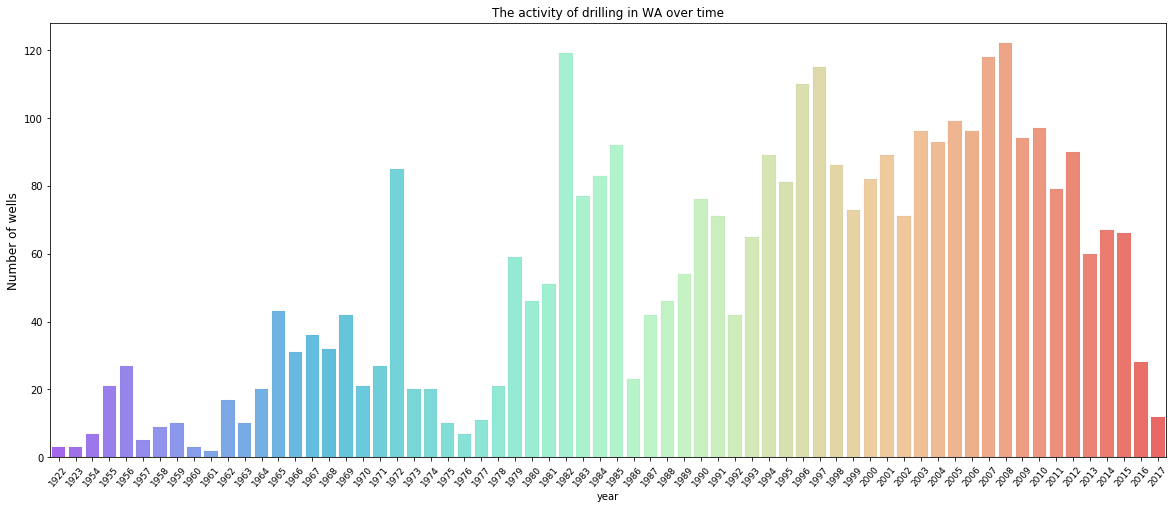

In [16]:
years = df.groupby("year")["well"].count().reset_index()
years_sorted = years.sort_values(by="year", ascending=True)
plt.figure(figsize=(20,8))
ax = sns.barplot(x="year",y="well",
                 data=years_sorted,palette="rainbow",alpha=0.7,
                linewidth = .05,edgecolor = "k"*40)
plt.ylabel('Number of wells', fontsize=12)
plt.title('The activity of drilling in WA over time')
ax.set_xticklabels(labels = years['year'], fontsize=9, rotation=50)
plt.show()

The chart shows the number of wells drilled over the years. it is observed that the peaks of drilling activities feel into years when the energy crisis happened

### 2.The contributions of wells by basins

In [10]:
df.basin.value_counts()

Carnarvon    2343
Perth         409
Canning       326
Bonaparte     248
Browse        161
Missing        15
Name: basin, dtype: int64

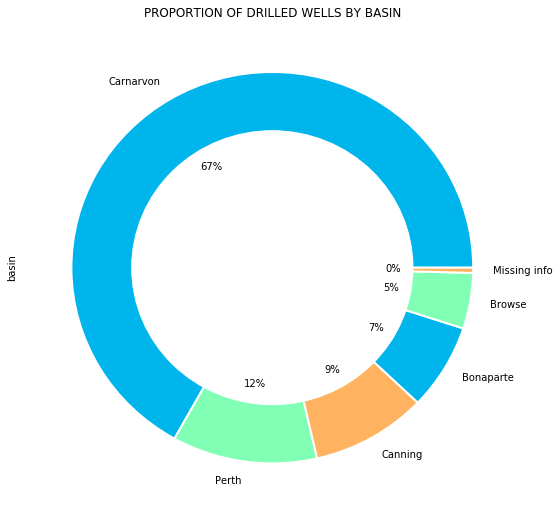

In [172]:
plt.figure(figsize=(9,9))
df["basin"].value_counts().plot.pie(autopct = "%1.0f%%",
                                             colors =sns.color_palette("rainbow",3),
                                             wedgeprops = {"linewidth":2,"edgecolor":"white"})
my_circ = plt.Circle((0,0),.7,color = "white")
plt.gca().add_artist(my_circ)
plt.title("PROPORTION OF DRILLED WELLS BY BASIN")
plt.show()

Carnarvon takes a large proportion of drilled wells. It is align with the fact that all almost  energy consumption comes from this Basin

### 3.Top Operators in WA

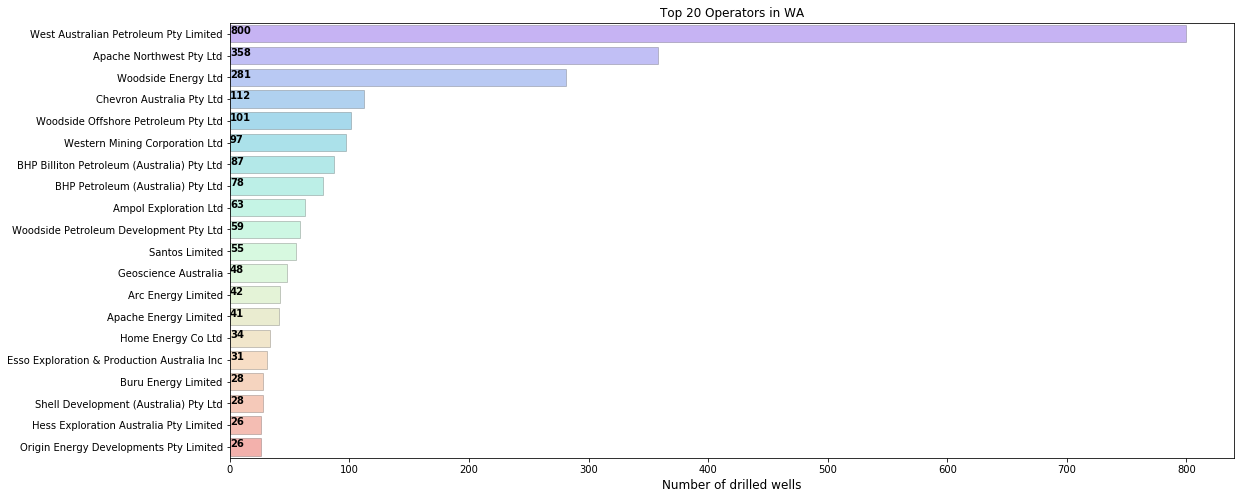

In [183]:
operators = df.groupby("well_operator")["well"].count().reset_index()
operators_sorted = operators.sort_values(by="well", ascending=False)
plt.figure(figsize=(18,8))
ax = sns.barplot(y="well_operator",x="well",
                 data=operators_sorted[:20],palette="rainbow",alpha=0.4,
                 linewidth = .5,edgecolor = "k"*20)
ax.set_xlabel(xlabel='Number of drilled wells', fontsize=12)
plt.ylabel('')
plt.title("Top 20 Operators in WA")
for i,j in enumerate(operators_sorted["well"][:20]):
    ax.text(.09,i,j,weight = "bold")

### 4. Top Drilling service providers in WA

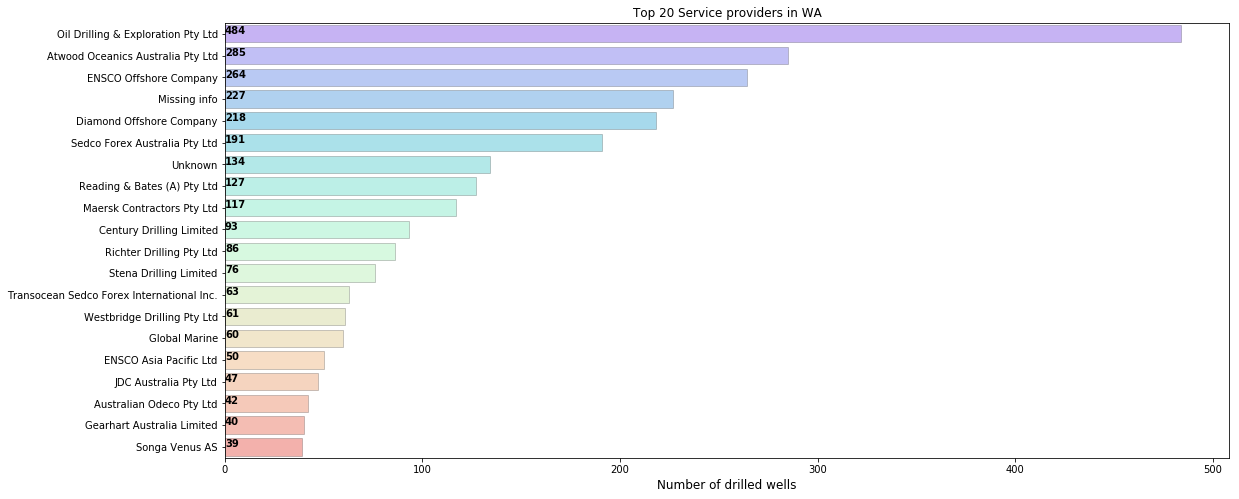

In [184]:
drilling_services = df.groupby("drilled_by")["well"].count().reset_index()
drilling_services_sorted = drilling_services.sort_values(by="well", ascending=False)
plt.figure(figsize=(18,8))
ax = sns.barplot(y="drilled_by",x="well",
                 data=drilling_services_sorted[:20],palette="rainbow",alpha=0.4,
                 linewidth = .5,edgecolor = "k"*20)
ax.set_xlabel(xlabel='Number of drilled wells', fontsize=12)
plt.ylabel('')
plt.title("Top 20 Service providers in WA")
for i,j in enumerate(drilling_services_sorted["well"][:20]):
    ax.text(.09,i,j,weight = "bold")

### 4. The mean rate of hydrocarbon show by Basins

In [237]:
#group data by basin
basins = df.groupby("basin").agg({'oil_show':"mean",
                                                  'gas_show':"mean",'condensate_show':"mean"
                                                  })

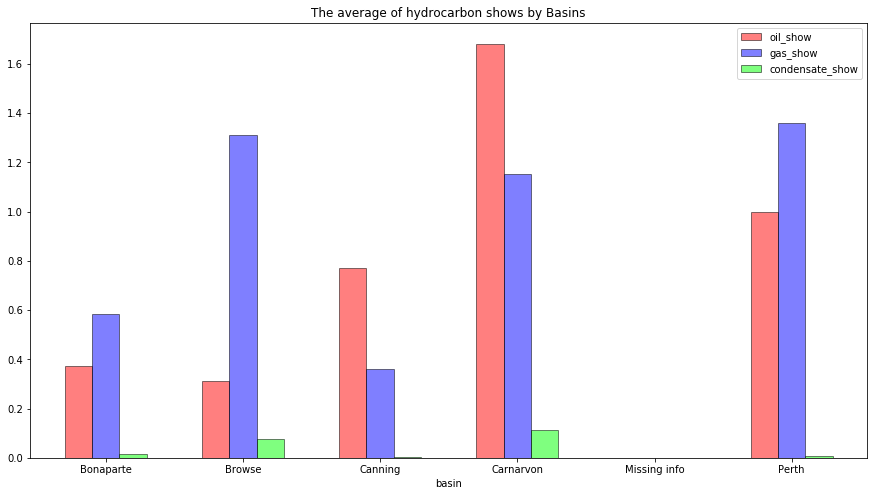

In [238]:
basins.plot(kind="bar",width=.6,figsize=(15,8),
               color=["r","b","lime"],alpha=.5,
              linewidth = 1,edgecolor = "k"*6)
plt.title("The average of hydrocarbon shows by Basins")
plt.xticks(rotation = 0)
plt.legend(loc ="upper right")
plt.show()

The chart shows the level of hydrocarbon shows by Basin. Since Carnarvon's drilling activities are on the top of oil shows, Perth is a basin has the top rate of the gas show. There are not much condensate shows in drilled wells over WA

### 5.Percentage of discovery by Basins

#### Percentage of discoveries in WA

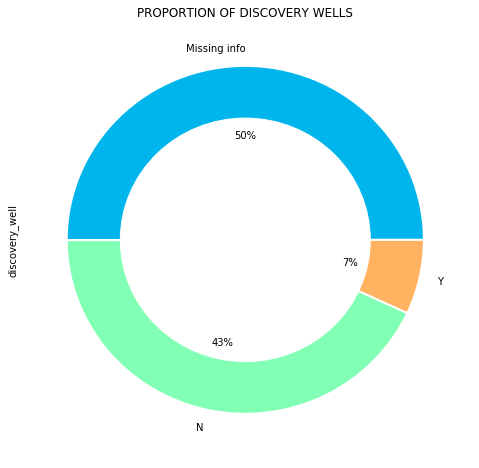

In [194]:
plt.figure(figsize=(8,8))
df["discovery_well"].value_counts().plot.pie(autopct = "%1.0f%%",
                                             colors =sns.color_palette("rainbow",3),
                                             wedgeprops = {"linewidth":2,"edgecolor":"white"})
my_circ = plt.Circle((0,0),.7,color = "white")
plt.gca().add_artist(my_circ)
plt.title("PROPORTION OF DISCOVERY WELLS")
plt.show()

There is only 7% of drilled wells is successed cases, in term of this well has a discovery. This value is ~ 10% averagely in the world

#### The distribution of discoveries by Basins

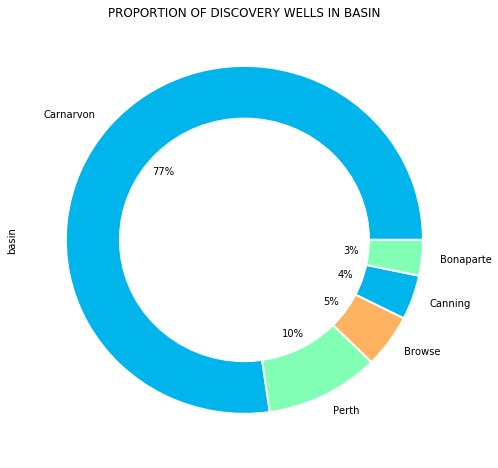

In [215]:
discovery_y = df[df.discovery_well == "Y"]
plt.figure(figsize=(8,8))
discovery_y["basin"].value_counts().plot.pie(autopct = "%1.0f%%",
                                             colors =sns.color_palette("rainbow",3),
                                             wedgeprops = {"linewidth":2,"edgecolor":"white"})
my_circ = plt.Circle((0,0),.7,color = "white")
plt.gca().add_artist(my_circ)
plt.title("PROPORTION OF DISCOVERY WELLS IN BASIN")
plt.show()

Again, Carnarvon basin plays a significant role in the Energy industry of WA since this basin contributed to 77% of success cases in WA

### 6. The distribution of drilling's total depth by success wells (discovered)

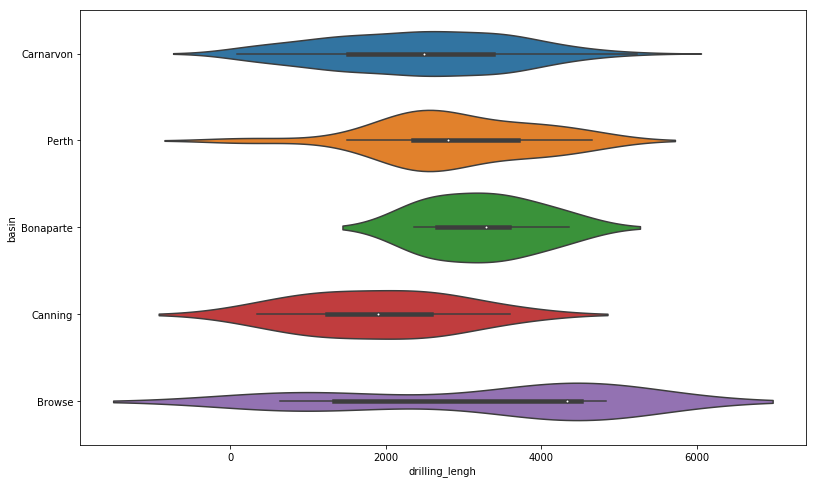

In [239]:
plt.figure(figsize=(13,8))
sns.violinplot(y='basin', x = 'drilling_lengh', data = discovery_y)
plt.show()

The total depth of success wells falls into a range from 2000 to 4500 metres of depth. The Browse basin has a large proportion of drilling activities deeper than 4500m because this Basin is in-depth water regional

### 7. Which facets of data contributed the drilling success?

In [18]:
# Calculate correlations between numeric features
correlations = df.corr()

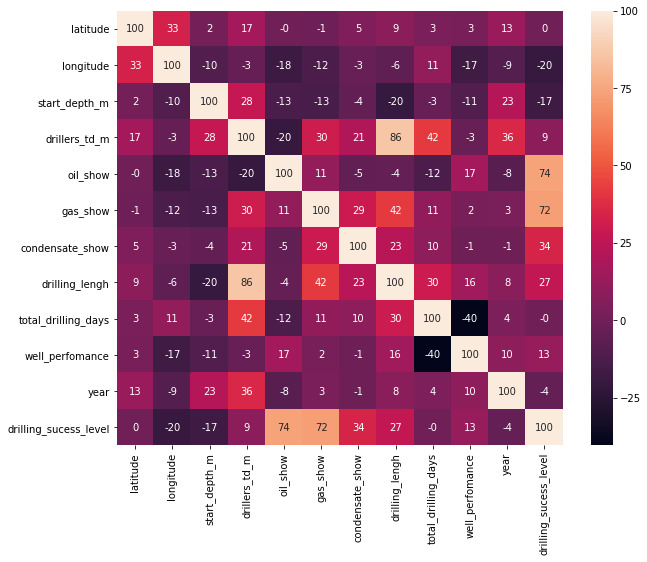

In [19]:
# Make the figsize 10 x 8
plt.figure(figsize=(10,8))

# Plot heatmap of annotated correlations
sns.heatmap(correlations * 100, annot=True, fmt='.0f')
plt.show()

In [242]:
# Generate a mask for the upper triangle
mask = np.zeros_like(correlations, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

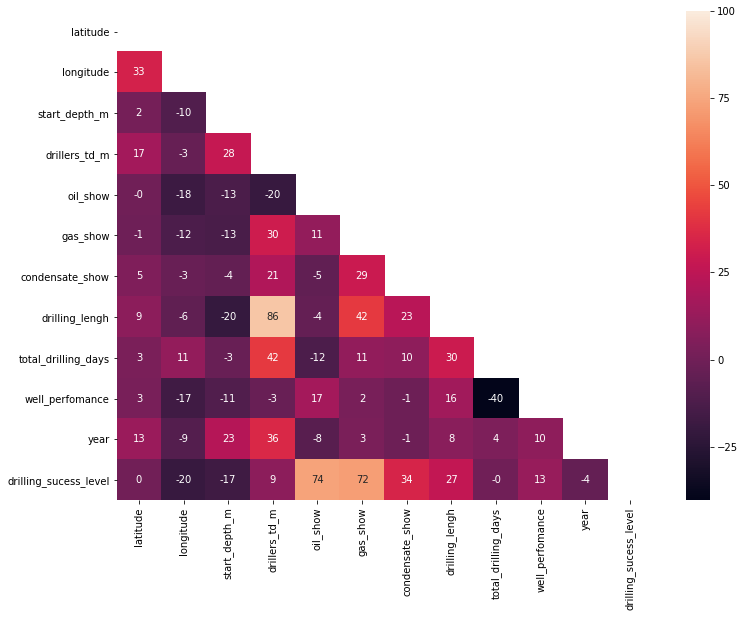

In [246]:
# Make the figsize 9 x 8
plt.figure(figsize=(12,9))

# Plot heatmap of correlations
sns.heatmap(correlations * 100, annot=True, fmt='.0f', mask=mask, cbar=True, )
plt.show()

The drilling success level has a strong relationship with oil_show and gas_show facets. So, It is concluded that the main contribution of WA's energy comes from oil & gas

### 8.The relational of drilling depth & total days of drilling to the drilling success level

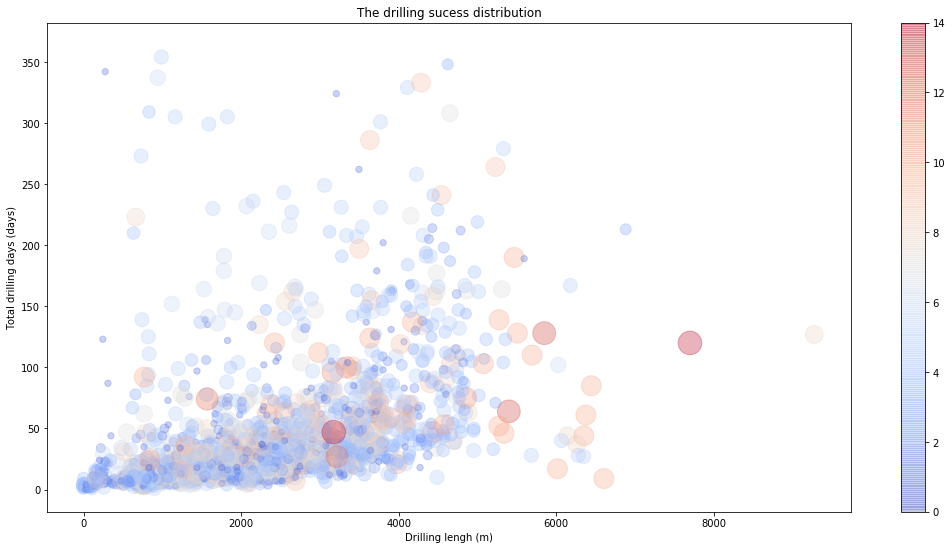

In [20]:
plt.figure(figsize=(18,9))
# Scatterplot
plt.scatter(df.drilling_lengh,
           df.total_drilling_days,
s=df.drilling_sucess_level*40,
            c=df.drilling_sucess_level,
            cmap='coolwarm', # Use the 'coolwarm' diverging colormap
            alpha=0.3)
# Axes labels
plt.title('The drilling sucess distribution')
plt.ylabel('Total drilling days (days)')
plt.xlabel('Drilling lengh (m)')
plt.colorbar()
# Clear "text residue"
plt.show()

The length of drilling activities is in-align with the total drilling days in WA since all almost of drilled wells fall into the range of depth from 0 to 400m and total drilling day from 0 to 100 days